# <center><b>Skin Cancer Classification for Detecting Melanoma <br> Using <br> Transfer Learning and Ensemble Modeling</b></center>
<center>
<h2>J-Component - Soft Computing</h2>
<p>Made under the guidance of <b>Dr. Agilandeeswari L</b><br>
</center>
By:<br>
Aashish Bansal 19BIT0346<br>
Keerthi Yasasvi 19BIT03<br>
Perumalla Sasank 19BIT03<br>
</p>


The project is a Transfer Learning and CNN trained model which can predict whether the patient has a suffering from Cancer or not by checking the images of the infected areas on the body. The model has been trained on a variety of images through which it predicts the required.
In this project, the image file of the patient is upload into a software, which is GUI-based interface, developed with the help of Tkinter, and it consists of the model saved as a file and the software uses that to analyze the image and give the prediction which can help doctors to start with the medication way faster instead of waiting for the laboratory reports for the confirmation.
So basically,
* Skin cancer is an abnormal growth of skin cells. Most skin cancers are caused by exposure to ultraviolet (UV) light. When the skin is not protected, UV rays from sunlight or tanning beds can damage and alter skin's DNA that leads to the cancer.
* Deep learning model has been built to classify and identify the binary diagnostic group of melanocytic images obtained through dermoscopy.
* Based on the model, disease detection through dermal cell images has been investigated, and classifications on dermal cell images have been performed.

Ensembles are predictive models that combine predictions from two or more other models. Ensemble learning methods are popular and the goto technique when the best performance on a predictive modeling project is the most important outcome. Nevertheless, they are not always the most appropriate technique to use and beginners the field of applied machine learning have the expectation that ensembles or a specific ensemble method are always the best method to use. Ensembles offer two specific benefits on a predictive modeling project, and it is important to know what these benefits are and how to measure them to ensure that using an ensemble is the right decision on your project. In this tutorial, you will discover the benefits of using ensemble methods for machine learning. After reading this tutorial, you will know:
*	A minimum benefit of using ensembles is to reduce the spread in the average skill of a predictive model.
*	A key benefit of using ensembles is to improve the average prediction performance over any contributing member in the ensemble.
*	The mechanism for improved performance with ensembles is often the reduction in the variance component of prediction errors made by the contributing models.


## 1. Preprocessing

### 1.1. Loading Libraries

#### 1.1.1. Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import os
import cv2
import csv

import matplotlib.pyplot as plt
# import matplotlib.pylab as plt

from sklearn.datasets import load_files

import keras
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Flatten, BatchNormalization, Activation, Dropout
from keras.callbacks import ModelCheckpoint, TensorBoard

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.python.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,GlobalAveragePooling2D,Activation,BatchNormalization,Dropout
from tensorflow.python.keras import Sequential,backend,optimizers

from numpy import *

from tkinter import *

from PIL import ImageTk
from PIL import ImageFile
from PIL import Image

from tqdm import tqdm

from glob import glob

ImageFile.LOAD_TRUNCATED_IMAGES = True

### 1.2. Loading Data

#### 1.2.1. Mounting Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### 1.2.2. Training Data

##### 1.2.2.1. Importing Training Data

In [3]:
# Load text files with categories as subfolder names.
path_training_data = "/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Training_Part3_GroundTruth.csv"
training_data = pd.read_csv(path_training_data)

##### 1.2.2.2 Display the Training Data of the CSV File

In [4]:
training_data

image_id  melanoma  seborrheic_keratosis
0     ISIC_0000000       0.0                   0.0
1     ISIC_0000001       0.0                   0.0
2     ISIC_0000002       1.0                   0.0
3     ISIC_0000003       0.0                   0.0
4     ISIC_0000004       1.0                   0.0
...            ...       ...                   ...
1995  ISIC_0015220       0.0                   1.0
1996  ISIC_0015233       0.0                   1.0
1997  ISIC_0015260       0.0                   1.0
1998  ISIC_0015284       1.0                   0.0
1999  ISIC_0015295       0.0                   1.0

[2000 rows x 3 columns]

In [5]:
print("Filename: \n", training_data['image_id'][:5])

Filename: 
 0    ISIC_0000000
1    ISIC_0000001
2    ISIC_0000002
3    ISIC_0000003
4    ISIC_0000004
Name: image_id, dtype: object


In [6]:
print("Targets: \n", training_data['melanoma'][:5])

Targets: 
 0    0.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: melanoma, dtype: float64


##### 1.2.2.3 Obtaining the Labels of all the Images as One-Hot Encoding

In [7]:
# Getting the labels
target = np_utils.to_categorical(np.array(training_data['melanoma']), 2)
target

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

##### 1.2.2.4 Checking the Number of Training Images

In [8]:
len(training_data['image_id'])

2000

##### 1.2.2.5 Loading the Image Filenames

In [9]:
# Splitting the data into the training and validation set
#load_dataset('/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Training_Data/Data Images JPG/')
train_files, train_targets = training_data['image_id'][:2000], target[:2000]

In [10]:
train_files

0       ISIC_0000000
1       ISIC_0000001
2       ISIC_0000002
3       ISIC_0000003
4       ISIC_0000004
            ...     
1995    ISIC_0015220
1996    ISIC_0015233
1997    ISIC_0015260
1998    ISIC_0015284
1999    ISIC_0015295
Name: image_id, Length: 2000, dtype: object

In [11]:
train_targets

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

#### 1.2.3 Validation Data

##### 1.2.3.1. Importing Validation Dataset

In [12]:
# Load text files with categories as subfolder names.
path_validation_data = "/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Validation_Part3_GroundTruth.csv"
validation_data = pd.read_csv(path_validation_data)

##### 1.2.3.2 Display the Validation Data of the CSV File

In [13]:
validation_data

image_id  melanoma  seborrheic_keratosis
0    ISIC_0001769       0.0                   0.0
1    ISIC_0001852       0.0                   0.0
2    ISIC_0001871       0.0                   0.0
3    ISIC_0003462       0.0                   0.0
4    ISIC_0003539       0.0                   0.0
..            ...       ...                   ...
145  ISIC_0015443       0.0                   0.0
146  ISIC_0015445       0.0                   0.0
147  ISIC_0015483       0.0                   0.0
148  ISIC_0015496       0.0                   0.0
149  ISIC_0015627       0.0                   0.0

[150 rows x 3 columns]

In [14]:
print("Filename: \n", validation_data['image_id'][:5])

Filename: 
 0    ISIC_0001769
1    ISIC_0001852
2    ISIC_0001871
3    ISIC_0003462
4    ISIC_0003539
Name: image_id, dtype: object


In [15]:
print("Targets: \n", validation_data['melanoma'][:5])

Targets: 
 0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: melanoma, dtype: float64


##### 1.2.3.3 Obtaining the Labels of all the Images as One-Hot Encoding

In [16]:
# Getting the labels
target = np_utils.to_categorical(np.array(validation_data['melanoma']), 2)
target

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

##### 1.2.3.4. Checking the Number of Validation Images

In [17]:
len(validation_data['image_id'])

150

##### 1.2.3.5 Loading the Images Filenames of the Validation Data

In [18]:
# train_files, train_targets = training_data['image_id'][:2000], target[:2000]
valid_files, valid_targets = validation_data['image_id'][:150], target[:150]

In [19]:
valid_files

0      ISIC_0001769
1      ISIC_0001852
2      ISIC_0001871
3      ISIC_0003462
4      ISIC_0003539
           ...     
145    ISIC_0015443
146    ISIC_0015445
147    ISIC_0015483
148    ISIC_0015496
149    ISIC_0015627
Name: image_id, Length: 150, dtype: object

In [20]:
valid_targets

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

#### 1.2.4. Testing Data

##### 1.2.4.1.  Importing Testing Dataset

In [21]:
# Load text files with categories as subfolder names.
path_testing_data = "/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Test_v2_Part3_GroundTruth.csv"
testing_data = pd.read_csv(path_testing_data)

##### 1.2.4.2. Display the Testing Data of the CSV File

In [22]:
testing_data

image_id  melanoma  seborrheic_keratosis
0    ISIC_0012086       0.0                   1.0
1    ISIC_0012092       0.0                   0.0
2    ISIC_0012095       0.0                   0.0
3    ISIC_0012134       0.0                   1.0
4    ISIC_0012136       0.0                   1.0
..            ...       ...                   ...
595  ISIC_0016068       0.0                   0.0
596  ISIC_0016069       0.0                   0.0
597  ISIC_0016070       0.0                   0.0
598  ISIC_0016071       0.0                   0.0
599  ISIC_0016072       0.0                   0.0

[600 rows x 3 columns]

In [23]:
print("Filename: \n", testing_data['image_id'][:5])

Filename: 
 0    ISIC_0012086
1    ISIC_0012092
2    ISIC_0012095
3    ISIC_0012134
4    ISIC_0012136
Name: image_id, dtype: object


In [24]:
print("Targets: \n", testing_data['melanoma'][:5])

Targets: 
 0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: melanoma, dtype: float64


##### 1.2.4.3. Obtaining the Labels of all the Images as One-Hot Encoding

In [25]:
# Getting the labels
test_target = np_utils.to_categorical(np.array(testing_data['melanoma']), 2)
test_target

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

##### 1.2.4.4. Checking the Number of Testing Images

In [26]:
len(testing_data['image_id'])

600

##### 1.2.4.5. Loading the Images Filenames of the Testing Data

In [27]:
# train_files, train_targets = training_data['image_id'][:2000], target[:2000]
test_files, test_targets = testing_data['image_id'][:600], test_target[:600]

In [28]:
test_files

0      ISIC_0012086
1      ISIC_0012092
2      ISIC_0012095
3      ISIC_0012134
4      ISIC_0012136
           ...     
595    ISIC_0016068
596    ISIC_0016069
597    ISIC_0016070
598    ISIC_0016071
599    ISIC_0016072
Name: image_id, Length: 600, dtype: object

In [29]:
len(test_targets)

600

In [30]:
test_targets

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

### 1.3. Image preprocessing

In [31]:
def path_to_tensor(img_path):
    """
    Getting a tensor from a given path.
    """
    # Loading the image
    img = image.load_img(img_path, target_size=(512, 512))
    # Converting the image to numpy array
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 512, 512, 3)
    return np.expand_dims(x, axis=0)

In [32]:
def paths_to_tensor(img_paths):
    """
    # Getting a list of tensors from a given path directory.
    """
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

#### 1.3.1 Training Data

##### 1.3.1.1. Display the Filenames of Training Data

In [33]:
train_files

0       ISIC_0000000
1       ISIC_0000001
2       ISIC_0000002
3       ISIC_0000003
4       ISIC_0000004
            ...     
1995    ISIC_0015220
1996    ISIC_0015233
1997    ISIC_0015260
1998    ISIC_0015284
1999    ISIC_0015295
Name: image_id, Length: 2000, dtype: object

##### 1.3.1.2. DIsplay all the Filenames present in the Dataset Directory

In [34]:
import os
os.chdir("/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Training_Data/Data Images JPG/")
!ls

ISIC_0000000.jpg  ISIC_0002885.jpg  ISIC_0011227.jpg  ISIC_0013474.jpg
ISIC_0000001.jpg  ISIC_0002948.jpg  ISIC_0011229.jpg  ISIC_0013480.jpg
ISIC_0000002.jpg  ISIC_0002975.jpg  ISIC_0011230.jpg  ISIC_0013486.jpg
ISIC_0000003.jpg  ISIC_0002976.jpg  ISIC_0011292.jpg  ISIC_0013487.jpg
ISIC_0000004.jpg  ISIC_0003005.jpg  ISIC_0011294.jpg  ISIC_0013488.jpg
ISIC_0000006.jpg  ISIC_0003051.jpg  ISIC_0011296.jpg  ISIC_0013489.jpg
ISIC_0000007.jpg  ISIC_0003056.jpg  ISIC_0011297.jpg  ISIC_0013490.jpg
ISIC_0000008.jpg  ISIC_0003174.jpg  ISIC_0011298.jpg  ISIC_0013492.jpg
ISIC_0000009.jpg  ISIC_0003308.jpg  ISIC_0011300.jpg  ISIC_0013493.jpg
ISIC_0000010.jpg  ISIC_0003346.jpg  ISIC_0011303.jpg  ISIC_0013494.jpg
ISIC_0000011.jpg  ISIC_0003728.jpg  ISIC_0011304.jpg  ISIC_0013495.jpg
ISIC_0000012.jpg  ISIC_0004110.jpg  ISIC_0011305.jpg  ISIC_0013497.jpg
ISIC_0000013.jpg  ISIC_0004115.jpg  ISIC_0011306.jpg  ISIC_0013498.jpg
ISIC_0000014.jpg  ISIC_0004166.jpg  ISIC_0011310.jpg  ISIC_0013499.jpg
ISIC_0

##### 1.3.1.3 Joining the Filenames with the Directory Path of Every File

In [35]:
# pre-process the data for Keras
# Training Path: /content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Training_Data/Data Images JPG
# os.path.join(folder, file)
dt = os.walk('/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Training_Data/Data Images JPG')
files = []
for root, d_names, f_names in dt:
    for filename in f_names:
        files.append(os.path.join(root, filename))

In [36]:
files

['/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Training_Data/Data Images JPG/ISIC_0011217.jpg',
 '/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Training_Data/Data Images JPG/ISIC_0011214.jpg',
 '/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Training_Data/Data Images JPG/ISIC_0011220.jpg',
 '/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Training_Data/Data Images JPG/ISIC_0011230.jpg',
 '/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Training_Data/Data Images JPG/ISIC_0011218.jpg',
 '/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Training_Data/Data Images JPG/ISIC_0011292.jpg',
 '/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Training_Data/Data Images JPG/ISIC_0011223.jpg',
 '/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Training_Data/Data Images JPG/ISIC_0011300.jpg',
 '/content/drive/MyDrive

##### 1.3.1.4. Converting the Complete Filenames to Tensors

In [ ]:
train_tensors = paths_to_tensor(files).astype('float32')/255

100%|██████████| 2000/2000 [48:57<00:00,  1.47s/it]


#### 1.3.2. Validation Data

##### 1.3.2.1. Display the Filenames of Validation Data

In [37]:
valid_files

0      ISIC_0001769
1      ISIC_0001852
2      ISIC_0001871
3      ISIC_0003462
4      ISIC_0003539
           ...     
145    ISIC_0015443
146    ISIC_0015445
147    ISIC_0015483
148    ISIC_0015496
149    ISIC_0015627
Name: image_id, Length: 150, dtype: object

##### 1.3.2.2. DIsplay all the Filenames present in the Dataset Directory

In [38]:
import os
os.chdir("/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Validation_Data/Data Image JPG/")
!ls

ISIC_0001769.jpg  ISIC_0012221.jpg  ISIC_0013501.jpg  ISIC_0014611.jpg
ISIC_0001852.jpg  ISIC_0012222.jpg  ISIC_0013518.jpg  ISIC_0014616.jpg
ISIC_0001871.jpg  ISIC_0012254.jpg  ISIC_0013527.jpg  ISIC_0014618.jpg
ISIC_0003462.jpg  ISIC_0012256.jpg  ISIC_0013549.jpg  ISIC_0014620.jpg
ISIC_0003539.jpg  ISIC_0012288.jpg  ISIC_0013561.jpg  ISIC_0014623.jpg
ISIC_0003582.jpg  ISIC_0012306.jpg  ISIC_0013562.jpg  ISIC_0014624.jpg
ISIC_0003657.jpg  ISIC_0012313.jpg  ISIC_0013632.jpg  ISIC_0014633.jpg
ISIC_0003805.jpg  ISIC_0012316.jpg  ISIC_0013637.jpg  ISIC_0014635.jpg
ISIC_0004337.jpg  ISIC_0012335.jpg  ISIC_0013644.jpg  ISIC_0014637.jpg
ISIC_0006651.jpg  ISIC_0012380.jpg  ISIC_0013651.jpg  ISIC_0014688.jpg
ISIC_0006671.jpg  ISIC_0012383.jpg  ISIC_0013663.jpg  ISIC_0014712.jpg
ISIC_0006815.jpg  ISIC_0012400.jpg  ISIC_0013702.jpg  ISIC_0014809.jpg
ISIC_0006914.jpg  ISIC_0012417.jpg  ISIC_0013736.jpg  ISIC_0014829.jpg
ISIC_0007141.jpg  ISIC_0012434.jpg  ISIC_0013793.jpg  ISIC_0014857.jpg
ISIC_0

##### 1.3.2.3 Joining the Filenames with the Directory Path of Every File

In [39]:
dt = os.walk('/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Validation_Data/Data Image JPG')
validation_files = []
for root, d_names, f_names in dt:
    for filename in f_names:
        validation_files.append(os.path.join(root, filename))

In [40]:
validation_files

['/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Validation_Data/Data Image JPG/ISIC_0004337.jpg',
 '/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Validation_Data/Data Image JPG/ISIC_0001769.jpg',
 '/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Validation_Data/Data Image JPG/ISIC_0003582.jpg',
 '/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Validation_Data/Data Image JPG/ISIC_0003539.jpg',
 '/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Validation_Data/Data Image JPG/ISIC_0003805.jpg',
 '/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Validation_Data/Data Image JPG/ISIC_0006651.jpg',
 '/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Validation_Data/Data Image JPG/ISIC_0001852.jpg',
 '/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Validation_Data/Data Image JPG/ISIC_0003657.jpg',
 '/content/drive

##### 1.3.2.4. Converting the Complete Filenames to Tensors

In [ ]:
valid_tensors = paths_to_tensor(validation_files).astype('float32')/255

100%|██████████| 150/150 [04:55<00:00,  1.97s/it]


#### 1.3.3. Test Data

##### 1.3.3.1. Display the Filenames of Testing Data

In [41]:
test_files

0      ISIC_0012086
1      ISIC_0012092
2      ISIC_0012095
3      ISIC_0012134
4      ISIC_0012136
           ...     
595    ISIC_0016068
596    ISIC_0016069
597    ISIC_0016070
598    ISIC_0016071
599    ISIC_0016072
Name: image_id, Length: 600, dtype: object

##### 1.3.3.2. DIsplay all the Filenames present in the Dataset Directory

In [42]:
import os
os.chdir("/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Test_v2_Data/Data Image JPG/")
!ls

ISIC_0012086.jpg  ISIC_0014027.jpg  ISIC_0014964.jpg  ISIC_0015482.jpg
ISIC_0012092.jpg  ISIC_0014059.jpg  ISIC_0014966.jpg  ISIC_0015485.jpg
ISIC_0012095.jpg  ISIC_0014077.jpg  ISIC_0014968.jpg  ISIC_0015510.jpg
ISIC_0012134.jpg  ISIC_0014090.jpg  ISIC_0014969.jpg  ISIC_0015526.jpg
ISIC_0012136.jpg  ISIC_0014103.jpg  ISIC_0014973.jpg  ISIC_0015537.jpg
ISIC_0012147.jpg  ISIC_0014110.jpg  ISIC_0014974.jpg  ISIC_0015544.jpg
ISIC_0012149.jpg  ISIC_0014117.jpg  ISIC_0014977.jpg  ISIC_0015559.jpg
ISIC_0012152.jpg  ISIC_0014129.jpg  ISIC_0014982.jpg  ISIC_0015563.jpg
ISIC_0012178.jpg  ISIC_0014148.jpg  ISIC_0014992.jpg  ISIC_0015566.jpg
ISIC_0012199.jpg  ISIC_0014160.jpg  ISIC_0014994.jpg  ISIC_0015568.jpg
ISIC_0012207.jpg  ISIC_0014177.jpg  ISIC_0014998.jpg  ISIC_0015582.jpg
ISIC_0012215.jpg  ISIC_0014181.jpg  ISIC_0015002.jpg  ISIC_0015593.jpg
ISIC_0012216.jpg  ISIC_0014186.jpg  ISIC_0015003.jpg  ISIC_0015603.jpg
ISIC_0012223.jpg  ISIC_0014219.jpg  ISIC_0015004.jpg  ISIC_0015607.jpg
ISIC_0

##### 1.3.3.3 Joining the Filenames with the Directory Path of Every File

In [43]:
# pre-process the data for Keras
# Training Path: /content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Training_Data/Data Images JPG
# os.path.join(folder, file)
dt = os.walk('/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Test_v2_Data/Data Image JPG')
test_files = []
for root, d_names, f_names in dt:
    for filename in f_names:
        test_files.append(os.path.join(root, filename))

In [44]:
len(test_files)

600

In [45]:
test_files

['/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Test_v2_Data/Data Image JPG/ISIC_0012095.jpg',
 '/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Test_v2_Data/Data Image JPG/ISIC_0012092.jpg',
 '/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Test_v2_Data/Data Image JPG/ISIC_0012086.jpg',
 '/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Test_v2_Data/Data Image JPG/ISIC_0012215.jpg',
 '/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Test_v2_Data/Data Image JPG/ISIC_0012240.jpg',
 '/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Test_v2_Data/Data Image JPG/ISIC_0012207.jpg',
 '/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Test_v2_Data/Data Image JPG/ISIC_0012216.jpg',
 '/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Test_v2_Data/Data Image JPG/ISIC_0012149.jpg',
 '/content/drive/MyDrive/dataset/ISIC Ch

##### 1.3.3.4. Converting the Complete Filenames to Tensors

In [ ]:
test_tensors = paths_to_tensor(test_files).astype('float32')/255

100%|██████████| 600/600 [23:36<00:00,  2.36s/it]


### 1.4. Saving Tensor Files

#### 1.4.1 Saving Files into Drive

In [ ]:
# Saving the data
np.save("/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved image tensors/augmented_training_tensors.npy", train_tensors)
np.save("/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved image tensors/augmented_validation_tensors.npy", valid_tensors)
np.save("/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved image tensors/augmented_testing_tensors.npy", test_tensors)

#### 1.4.2 Loading the Tensor Files into Model

In [46]:
# Loading the data
train_tensors = np.load("/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved image tensors/augmented_training_tensors.npy")
valid_tensors = np.load("/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved image tensors/augmented_validation_tensors.npy")
test_tensors = np.load("/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved image tensors/augmented_testing_tensors.npy")

## 2. Training the model

### 2.1. MobileNet Architecture

#### 2.1.1 Defining the MobileNet Architecture Function

In [47]:
def mobilenet_architecture():
    """
    Pre-build architecture of mobilenet for our dataset.
    """
    # Imprting the model
    from keras.applications.mobilenet import MobileNet

    # Pre-build model
    base_model = MobileNet(include_top = False, weights = None, input_shape = (512, 512, 3))

    # Adding output layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    output = Dense(units = 2, activation = 'softmax')(x)

    # Creating the whole model
    mobilenet_model = Model(base_model.input, output)
    
    # Getting the summary of architecture
    mobilenet_model.summary()
    
    # Compiling the model
    mobilenet_model.compile(optimizer = keras.optimizers.Adam(lr = 0.001), 
                            loss = 'categorical_crossentropy', 
                            metrics = ['accuracy'])

    return mobilenet_model

In [48]:
# Getting the mobilenet
mobilenet_model = mobilenet_architecture()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 256, 256, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 256, 256, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 256, 256, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 256, 256, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 256, 256, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 256, 256, 32)      0     

#### 2.1.2. Creating a Checkpoint for the Model

In [49]:
checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/weights.best.mobilenet.hdf5', 
                               verbose=1, 
                               save_best_only=True)

#### 2.1.3. Fitting into the Model

In [50]:
mobilenet_model.fit(train_tensors, 
                    train_targets, 
                    batch_size = 8,
                    validation_data = (valid_tensors, valid_targets),
                    epochs = 5,
                    callbacks=[checkpointer], 
                    verbose=1)

Epoch 1/5
250/250 [==============================] - 70s 205ms/step - loss: 0.5794 - accuracy: 0.7989 - val_loss: 0.6986 - val_accuracy: 0.8000

Epoch 00001: val_loss improved from inf to 0.69860, saving model to /content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/weights.best.mobilenet.hdf5
Epoch 2/5
250/250 [==============================] - 50s 201ms/step - loss: 0.5238 - accuracy: 0.7931 - val_loss: 0.5227 - val_accuracy: 0.8000

Epoch 00002: val_loss improved from 0.69860 to 0.52275, saving model to /content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/weights.best.mobilenet.hdf5
Epoch 3/5
250/250 [==============================] - 50s 201ms/step - loss: 0.4979 - accuracy: 0.8160 - val_loss: 0.5946 - val_accuracy: 0.7733

Epoch 00003: val_loss did not improve from 0.52275
Epoch 4/5
250/250 [==============================] - 50s 202ms/step - loss: 0.4866 - accuracy: 0.8210 - val_loss: 0.5261 - val_accuracy: 0.7667

Epoch 00004: val_loss did

#### 2.1.4. Loading the Weights for the MobileNet

In [51]:
# Loading the weights
mobilenet_model.load_weights("/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/weights.best.mobilenet.hdf5")

### 2.2. Inception Architecture

#### 2.2.1 Defining the Inception Architecture Function

In [52]:
def inception_architecture():
    """
    Pre-build architecture of inception for our dataset.
    """
    # Imprting the model 
    from keras.applications.inception_v3 import InceptionV3

    # Pre-build model
    base_model = InceptionV3(include_top = False, weights = None, input_shape = (512, 512, 3))

    # Adding output layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    output = Dense(units = 2, activation = 'softmax')(x)

    # Creating the whole model
    inception_model = Model(base_model.input, output)
    
    # Summary of the model
    inception_model.summary()
    
    # Compiling the model
    inception_model.compile(optimizer = keras.optimizers.Adam(lr = 0.001), 
                            loss = 'categorical_crossentropy', 
                            metrics = ['accuracy'])
    
    return inception_model

In [53]:
# Getting the inception
inception_model = inception_architecture()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 255, 255, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 255, 255, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 255, 255, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

#### 2.2.2 Creating a Checkpoint for the Model

In [54]:
checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/weights.best.InceptionV3.hdf5', 
                               verbose=1, 
                               save_best_only=True)

#### 2.2.3 Fitting into the Model

In [55]:
inception_model.fit(train_tensors, 
                    train_targets, 
                    batch_size = 8,
                    validation_data = (valid_tensors, valid_targets),
                    epochs = 5,
                    callbacks=[checkpointer], 
                    verbose=1)

Epoch 1/5
250/250 [==============================] - 61s 214ms/step - loss: 0.7063 - accuracy: 0.7772 - val_loss: 0.5034 - val_accuracy: 0.8000

Epoch 00001: val_loss improved from inf to 0.50343, saving model to /content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/weights.best.InceptionV3.hdf5
Epoch 2/5
250/250 [==============================] - 52s 207ms/step - loss: 0.5279 - accuracy: 0.8252 - val_loss: 3.0148 - val_accuracy: 0.7467

Epoch 00002: val_loss did not improve from 0.50343
Epoch 3/5
250/250 [==============================] - 52s 207ms/step - loss: 0.5155 - accuracy: 0.8026 - val_loss: 0.5386 - val_accuracy: 0.8000

Epoch 00003: val_loss did not improve from 0.50343
Epoch 4/5
250/250 [==============================] - 52s 208ms/step - loss: 0.4753 - accuracy: 0.8220 - val_loss: 0.5829 - val_accuracy: 0.8000

Epoch 00004: val_loss did not improve from 0.50343
Epoch 5/5
250/250 [==============================] - 52s 207ms/step - loss: 0.5201 - accuracy: 

#### 2.2.4 Loading the Weights for the Inception

In [56]:
# Loading the weights
inception_model.load_weights("/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/weights.best.InceptionV3.hdf5")

### 2.3 Xception architecture

#### 2.3.1 Defining the Xception Architechture

In [57]:
def xception_architecture():
    """
    Pre-build architecture of inception for our dataset.
    """
    # Imprting the model
    from keras.applications.xception import Xception

    # Pre-build model
    base_model = Xception(include_top = False, weights = None, input_shape = (512, 512, 3))

    # Adding output layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    output = Dense(units = 2, activation = 'softmax')(x)

    # Creating the whole model
    xception_model = Model(base_model.input, output)

    # Summary of the model
    xception_model.summary()
    
    # Compiling the model
    xception_model.compile(optimizer = keras.optimizers.Adam(lr = 0.001), 
                           loss = 'categorical_crossentropy', 
                           metrics = ['accuracy'])

    return xception_model

In [58]:
# Getting the xception
xception_model = xception_architecture()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 255, 255, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 255, 255, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 255, 255, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

#### 2.3.2 Creating a Checkpoint for the Model

In [59]:
tensor_board = TensorBoard(log_dir='./logs', histogram_freq = 0, batch_size = 8)

checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/xception_weights.hdf5', 
                               verbose=1, 
                               save_best_only=True)

#### 2.3.3 Fitting into the Model

In [60]:
xception_model.fit(train_tensors, 
                   train_targets, 
                   batch_size = 8,
                   validation_data = (valid_tensors, valid_targets),
                   epochs = 2,
                   callbacks=[checkpointer, tensor_board], 
                   verbose=1)

Epoch 1/2
250/250 [==============================] - 146s 564ms/step - loss: 0.6982 - accuracy: 0.7663 - val_loss: 0.5005 - val_accuracy: 0.8000

Epoch 00001: val_loss improved from inf to 0.50048, saving model to /content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/xception_weights.hdf5
Epoch 2/2
250/250 [==============================] - 140s 558ms/step - loss: 0.5042 - accuracy: 0.8141 - val_loss: 0.5278 - val_accuracy: 0.8000

Epoch 00002: val_loss did not improve from 0.50048


#### 2.3.4 Loading the Weights

In [61]:
# Loading the weights
xception_model.load_weights("/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/xception_weights.hdf5")

## 3. Prediction

#### Declaring some Variables

In [62]:
predict_0_0 = 0
predict_0_1 = 0

In [63]:
model_architecture = None
weight_path = ""

#### Defining the Prediction Function

In [64]:
def predict(img_path,
            model_architecture = model_architecture, 
            path_model_weight = weight_path):
    # Printing the information passed to the Predict Function
    print("Image Path: "+img_path)
    print("Arhitecture Used:")
    print(model_architecture)
    print("Path for Model Weights: ")
    print(path_model_weight)
    # Getting the tensor of image
    image_to_predict = path_to_tensor(img_path).astype('float32')/255
    # Getting the model's architecture
    model = model_architecture
    # Loading the weights
    model.load_weights(path_model_weight)
    # printing the weights
    print("Model Weights: ")
    print(model.load_weights(path_model_weight))
    # Predicting
    pred = model.predict(image_to_predict)
    print("Prediction..." + " Melanoma : ", pred[0][0], " | Other : ", pred[0][1])
    predict_0_0 = pred[0][0]
    predict_0_1 = pred[0][1]
    if np.argmax(pred) == 0:
        return [1., 0.]
    elif np.argmax(pred) == 1:
        return [0., 1.]

### 3.1 MobileNet Architecture

#### 3.1.1 Loading the Model and Weights

In [65]:
model_architecture = mobilenet_architecture()
weight_path = "/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/weights.best.mobilenet.hdf5"

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 256, 256, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 256, 256, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 256, 256, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 256, 256, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 256, 256, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 256, 256, 32)      0   

#### 3.1.3 Predicting for a Sample Image Using MobileNet

In [66]:
predict("/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Validation_Data/Data Image JPG/ISIC_0001769.jpg", model_architecture, weight_path)

Image Path: /content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Validation_Data/Data Image JPG/ISIC_0001769.jpg
Arhitecture Used:
Path for Model Weights: 
/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/weights.best.mobilenet.hdf5
Model Weights: 
None
Prediction... Melanoma :  0.7077285  | Other :  0.29227155


[1.0, 0.0]

### 3.2 Inception Architecture

#### 3.2.1 Loading the Model and Weights

In [67]:
model_architecture = inception_architecture()
weight_path = "/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/weights.best.InceptionV3.hdf5"

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv2d_98 (Conv2D)              (None, 255, 255, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_98 (BatchNo (None, 255, 255, 32) 96          conv2d_98[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 255, 255, 32) 0           batch_normalization_98[0][0]     
____________________________________________________________________________________________

#### 3.2.2 Predicting for a Sample Image Using InceptionV3

In [68]:
predict("/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Validation_Data/Data Image JPG/ISIC_0001769.jpg", model_architecture, weight_path)

Image Path: /content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Validation_Data/Data Image JPG/ISIC_0001769.jpg
Arhitecture Used:
Path for Model Weights: 
/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/weights.best.InceptionV3.hdf5
Model Weights: 
None
Prediction... Melanoma :  0.76264024  | Other :  0.23735973


[1.0, 0.0]

### 3.3 Xception Architecture

#### 3.3.1 Loading the Model and Weights

In [69]:
model_architecture = xception_architecture()
weight_path = "/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/xception_weights.hdf5"

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 255, 255, 32) 864         input_6[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 255, 255, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 255, 255, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

#### 3.3.2 Predicting a Sample Image using Xception

In [70]:
predict("/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Validation_Data/Data Image JPG/ISIC_0001769.jpg", model_architecture, weight_path)

Image Path: /content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Validation_Data/Data Image JPG/ISIC_0001769.jpg
Arhitecture Used:
Path for Model Weights: 
/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/xception_weights.hdf5
Model Weights: 
None
Prediction... Melanoma :  0.8055125  | Other :  0.19448751


[1.0, 0.0]

## 4. Evaluating the Models Individually on Validation Data

In [71]:
# Importing the libraries
from sklearn.metrics import roc_curve, auc
import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

#### Defining Function to calculatae Receiving Operating Characteristic curve

In [72]:
def compute_roc(y_true, y_score):
    """ 
    Computing the "Receiving Operating Characteristic curve" and area
    """
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_true, y_score) 
    auroc = auc(false_positive_rate, true_positive_rate) 
    return false_positive_rate, true_positive_rate, auroc

#### Defining Function for Plotting the Receiving Operating Characteristic curve

In [73]:
def plot_roc(y_true, y_score):
    """ 
    Ploting the Receiving Operating Characteristic curve
    """
    false_positive_rate, true_positive_rate, auroc = compute_roc(y_true, y_score)
    plt.figure(figsize=(10,6))
    plt.grid()
    plt.plot(false_positive_rate, 
             true_positive_rate, 
             color='darkorange',
             lw=2, 
             label='ROC curve (area = {:.2f})'.format(auroc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('Receiver operating characteristic example', fontsize=15)
    plt.legend(loc="lower right", fontsize=14)
    plt.show()

In [74]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [75]:
plt.style.use("seaborn-white")

### 4.1 MobileNet Architecture

#### 4.1.1 Computing Test Set Predictions

In [76]:
# Compute test set predictions
#model_architecture,path_model_weight
NUMBER_TEST_SAMPLES = 150

mobilenet_architecture_function = mobilenet_architecture()
mobilenet_architecture_weight_path = "/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/weights.best.mobilenet.hdf5"

y_true_MobileNet = valid_targets[:NUMBER_TEST_SAMPLES]
y_score_MobileNet = []
for index in range(NUMBER_TEST_SAMPLES): #compute one at a time due to memory constraints
    probs = predict(img_path = validation_files[index], model_architecture = mobilenet_architecture_function, path_model_weight = mobilenet_architecture_weight_path)
    print("Real values..." + "Melanoma : ", valid_targets[index][0], " | Other : ", valid_targets[index][1])
    print("---------------------------------------------------------------------------")
    y_score_MobileNet.append(probs)
    
correct_MobileNet = np.array(y_true_MobileNet) == np.array(y_score_MobileNet)

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 256, 256, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 256, 256, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 256, 256, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 256, 256, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 256, 256, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 256, 256, 32)      0   

In [77]:
print("Accuracy = %2.2f%%" % (np.mean(correct_MobileNet)*100))

Accuracy = 80.00%


#### 4.1.2 Re-ordering Actual y for ROC

In [78]:
# Re-ordering the actual y (for ROC)
y_true_2_MobileNet = []
for i in range(len(y_true_MobileNet)):
    y_true_2_MobileNet.append(y_true_MobileNet[i][0])

#### 4.1.3 Re-ordering Predicte y for ROC

In [79]:
# Re-ordering the predicte y (for ROC)
y_score_2_MobileNet = []
for i in range(len(y_score_MobileNet)):
    y_score_2_MobileNet.append(y_score_MobileNet[i][0])

#### 4.1.4 Plotting the Re-ordered ROC

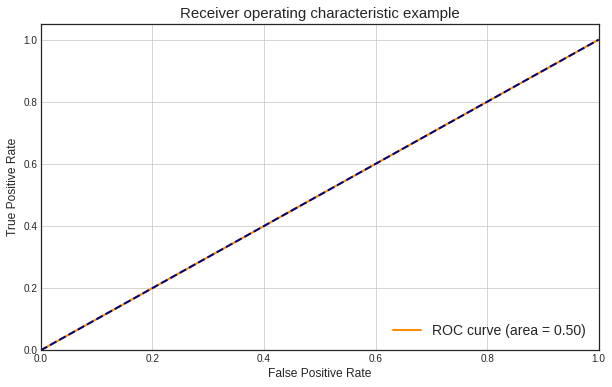

In [80]:
plot_roc(y_true_2_MobileNet, y_score_2_MobileNet)

#### 4.1.5 Confusion Matrix

##### 4.1.5.1 Defining the Confusion Matrix Function

In [81]:
def positive_negative_measurement(y_true, y_score):
    # Initialization
    TRUE_POSITIVE = 0
    FALSE_POSITIVE = 0
    TRUE_NEGATIVE = 0
    FALSE_NEGATIVE = 0
    
    # Calculating the model
    for i in range(len(y_score)):
        if y_true[i] == y_score[i] == 1:
            TRUE_POSITIVE += 1
        if (y_score[i] == 1) and (y_true[i] != y_score[i]):
            FALSE_POSITIVE += 1
        if y_true[i] == y_score[i] == 0:
            TRUE_NEGATIVE += 1
        if (y_score[i] == 0) and (y_true[i] != y_score[i]):
            FALSE_NEGATIVE += 1

    return(TRUE_POSITIVE, FALSE_POSITIVE, TRUE_NEGATIVE, FALSE_NEGATIVE)

In [82]:
TRUE_POSITIVE_MobileNet, FALSE_POSITIVE_MobileNet, TRUE_NEGATIVE_MobileNet, FALSE_NEGATIVE_MobileNet = positive_negative_measurement(y_true_2_MobileNet, y_score_2_MobileNet)
postives_negatives_MobileNet = [[TRUE_POSITIVE_MobileNet, FALSE_POSITIVE_MobileNet], 
                                [FALSE_NEGATIVE_MobileNet, TRUE_NEGATIVE_MobileNet]]

In [83]:
postives_negatives_MobileNet

[[120, 30], [0, 0]]

##### 4.1.5.2 Obtaining Labels

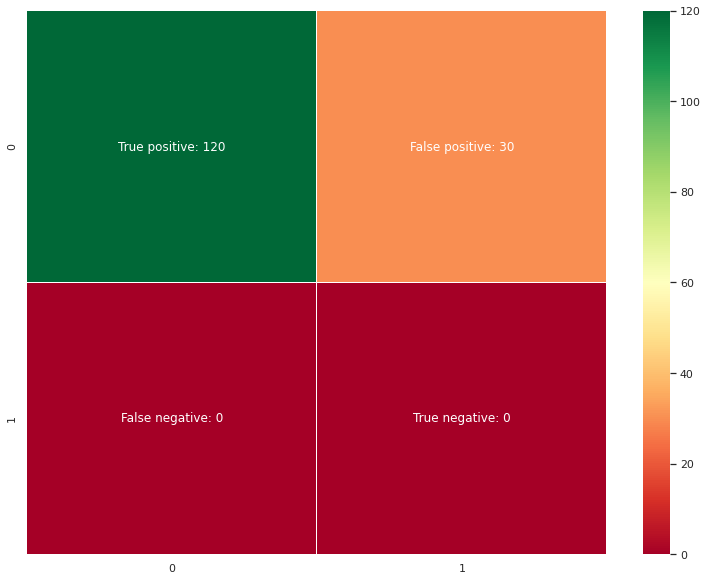

In [84]:
import seaborn as sns
sns.set()
labels_MobileNet =  np.array([['True positive: ' + str(TRUE_POSITIVE_MobileNet),
                                'False positive: ' + str(FALSE_POSITIVE_MobileNet)],
                                ['False negative: ' + str(FALSE_NEGATIVE_MobileNet),
                                'True negative: ' + str(TRUE_NEGATIVE_MobileNet)]])
plt.figure(figsize = (13, 10))
sns.heatmap(postives_negatives_MobileNet, annot = labels_MobileNet, linewidths = 0.1, fmt="", cmap = 'RdYlGn')

In [85]:
labels_MobileNet

array([['True positive: 120', 'False positive: 30'],
       ['False negative: 0', 'True negative: 0']], dtype='<U18')

##### 4.1.5.3 Calculating Sensitivity/Recall/Hit Rate/True Positive Rate

In [86]:
# Sensitivity | Recall | hit rate | true positive rate (TPR)
sensitivity_MobileNet = TRUE_POSITIVE_MobileNet / (TRUE_POSITIVE_MobileNet + FALSE_NEGATIVE_MobileNet)
print("Sensitivity: ", sensitivity_MobileNet)

Sensitivity:  1.0


##### 4.1.5.4 Calculating Specificity/Selectivity/True Negative Rate

In [87]:
# Specificity | selectivity | true negative rate (TNR)
try:
    specifity_MobileNet = TRUE_NEGATIVE_MobileNet / (TRUE_NEGATIVE_MobileNet + FALSE_NEGATIVE_MobileNet)
    print("Specifity: ", specifity_MobileNet)
except:
    print("No Specificity due to NO NEGATIVE results.")

No Specificity due to NO NEGATIVE results.


##### 4.1.5.5 Calculating Precision/Positive Predictive Value

In [88]:
# Precision | positive predictive value (PPV)
predcision_MobileNet = TRUE_POSITIVE_MobileNet / (TRUE_POSITIVE_MobileNet + FALSE_POSITIVE_MobileNet)
print("Precision: ", predcision_MobileNet)

Precision:  0.8


##### 4.1.5.6 Calculating Negative Predictive Value

In [89]:
# Negative predictive value (NPV)
try:
    npv_MobileNet = TRUE_NEGATIVE_MobileNet / (TRUE_NEGATIVE_MobileNet + FALSE_NEGATIVE_MobileNet)
    print("Negative predictive value: ", npv_MobileNet)
except:
    print("0 Negative Predictions")

0 Negative Predictions


##### 4.1.5.7 Calculating Accuracy

In [90]:
# Accuracy 
accuracy_MobileNet = (TRUE_POSITIVE_MobileNet + TRUE_NEGATIVE_MobileNet) / (TRUE_POSITIVE_MobileNet + FALSE_POSITIVE_MobileNet + TRUE_NEGATIVE_MobileNet + FALSE_NEGATIVE_MobileNet)
print("Accuracy: ", accuracy_MobileNet)

Accuracy:  0.8


### 4.2 Inception Architecture

#### 4.2.1 Compute Test Set Predictions

In [91]:
# Compute test set predictions
#model_architecture,path_model_weight
NUMBER_TEST_SAMPLES_Inception = 150

inception_architecture_function = inception_architecture()
inception_architecture_weight_path = "/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/weights.best.InceptionV3.hdf5"

y_true_Inception = valid_targets[:NUMBER_TEST_SAMPLES_Inception]
y_score_Inception = []
for index in range(NUMBER_TEST_SAMPLES_Inception): #compute one at a time due to memory constraints
    probs_Inception = predict(img_path = validation_files[index], model_architecture = inception_architecture_function, path_model_weight = inception_architecture_weight_path)
    print("Real values {}...".format(index+1) + "Melanoma : ", valid_targets[index][0], " | Other : ", valid_targets[index][1])
    print("---------------------------------------------------------------------------")
    y_score_Inception.append(probs_Inception)
    
correct_Inception = np.array(y_true_Inception) == np.array(y_score_Inception)

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv2d_196 (Conv2D)             (None, 255, 255, 32) 864         input_8[0][0]                    
__________________________________________________________________________________________________
batch_normalization_196 (BatchN (None, 255, 255, 32) 96          conv2d_196[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 255, 255, 32) 0           batch_normalization_196[0][0]    
____________________________________________________________________________________________

In [92]:
print("Accuracy = %2.2f%%" % (np.mean(correct_Inception)*100))

Accuracy = 80.00%


#### 4.2.2 Evaluating the Model

##### 4.2.2.1 Re-ordering the Actual y for ROC

In [93]:
# Re-ordering the actual y (for ROC)
y_true_2_Inception = []
for i in range(len(y_true_Inception)):
    y_true_2_Inception.append(y_true_Inception[i][0])

##### 4.2.2.2 Re-ordering the Predicte y for ROC

In [94]:
# Re-ordering the predicte y (for ROC)
y_score_2_Inception = []
for i in range(len(y_score_Inception)):
    y_score_2_Inception.append(y_score_Inception[i][0])

##### 4.2.2.3 Plotting the Re-ordered ROC

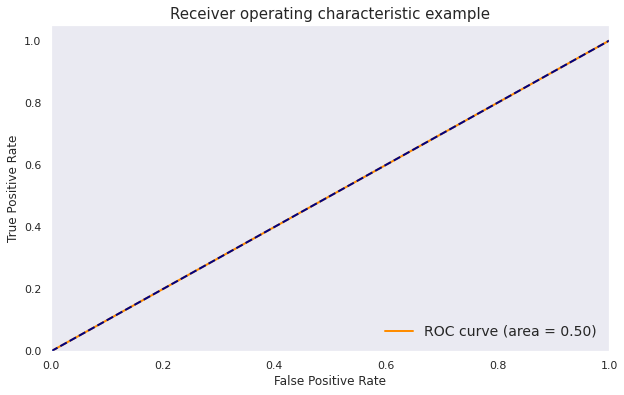

In [95]:
plot_roc(y_true_2_Inception, y_score_2_Inception)

##### 4.2.2.4 Confusion Matrix

###### 4.2.2.4.1 Defining the Confusion Matrix Function

In [96]:
def positive_negative_measurement(y_true, y_score):
    # Initialization
    TRUE_POSITIVE = 0
    FALSE_POSITIVE = 0
    TRUE_NEGATIVE = 0
    FALSE_NEGATIVE = 0
    
    # Calculating the model
    for i in range(len(y_score)):
        if y_true[i] == y_score[i] == 1:
            TRUE_POSITIVE += 1
        if (y_score[i] == 1) and (y_true[i] != y_score[i]):
            FALSE_POSITIVE += 1
        if y_true[i] == y_score[i] == 0:
            TRUE_NEGATIVE += 1
        if (y_score[i] == 0) and (y_true[i] != y_score[i]):
            FALSE_NEGATIVE += 1

    return(TRUE_POSITIVE, FALSE_POSITIVE, TRUE_NEGATIVE, FALSE_NEGATIVE)

###### 4.2.2.4.2 Obtaining Labels

In [97]:
TRUE_POSITIVE_Inception, FALSE_POSITIVE_Inception, TRUE_NEGATIVE_Inception, FALSE_NEGATIVE_Inception = positive_negative_measurement(y_true_2_Inception, y_score_2_Inception)
postives_negatives_Inception = [[TRUE_POSITIVE_Inception, FALSE_POSITIVE_Inception], 
                                [FALSE_NEGATIVE_Inception, TRUE_NEGATIVE_Inception]]

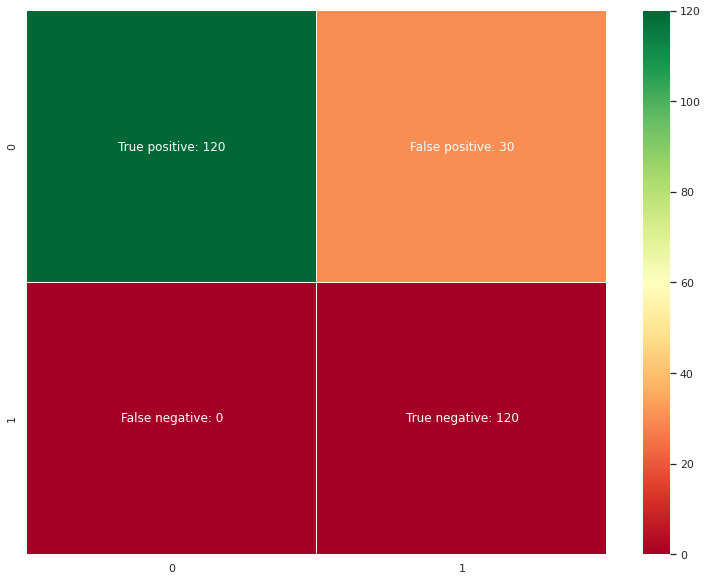

In [98]:
import seaborn as sns
sns.set()
labels_Inception =  np.array([['True positive: ' + str(TRUE_POSITIVE_Inception),
                     'False positive: ' + str(FALSE_POSITIVE_Inception)],
                    ['False negative: ' + str(FALSE_NEGATIVE_Inception),
                     'True negative: ' + str(TRUE_POSITIVE_Inception)]])
plt.figure(figsize = (13, 10))
sns.heatmap(postives_negatives_Inception, annot = labels_Inception, linewidths = 0.1, fmt="", cmap = 'RdYlGn')

###### 4.2.2.4.3 Calculating Sensitivity/Recall/Hit Rate/True Positive Rate

In [99]:
# Sensitivity | Recall | hit rate | true positive rate (TPR)
sensitivity_Inception = TRUE_POSITIVE_Inception / (TRUE_POSITIVE_Inception + FALSE_NEGATIVE_Inception)
print("Sensitivity: ", sensitivity_Inception)

Sensitivity:  1.0


###### 4.2.2.4.4 Calculating Specificity/Selectivity/True Negative Rate

In [100]:
# Specificity | selectivity | true negative rate (TNR)
try:
    specifity_Inception = TRUE_NEGATIVE_Inception / (TRUE_NEGATIVE_Inception + FALSE_NEGATIVE_Inception)
    print("Specifity: ", specifity_Inception)
except:
    print("No Specificity due to NO NEGATIVE results.")

No Specificity due to NO NEGATIVE results.


###### 4.2.2.4.5 Calculating Precision/Positive Predictive Value

In [101]:
# Precision | positive predictive value (PPV)
predcision_Inception = TRUE_POSITIVE_Inception / (TRUE_POSITIVE_Inception + FALSE_POSITIVE_Inception)
print("Precision: ", predcision_Inception)

Precision:  0.8


###### 4.2.2.4.6 Negative Predictive Value

In [102]:
# Negative predictive value (NPV)
try:
    npv_Inception = TRUE_NEGATIVE_Inception / (TRUE_NEGATIVE_Inception + FALSE_NEGATIVE_Inception)
    print("Negative predictive value: ", npv_Inception)
except:
    print("0 Negative Predictions")

0 Negative Predictions


###### 4.2.2.4.7 Calculating Accuracy

In [103]:
# Accuracy 
accuracy_Inception = (TRUE_POSITIVE_Inception + TRUE_NEGATIVE_Inception) / (TRUE_POSITIVE_Inception + FALSE_POSITIVE_Inception + TRUE_NEGATIVE_Inception + FALSE_NEGATIVE_Inception)
print("Accuracy: ", accuracy_Inception)

Accuracy:  0.8


### 4.3 Xception Architecture

#### 4.3.1 Compute Test Set Predictions

In [104]:
# Compute test set predictions
#model_architecture,path_model_weight
NUMBER_TEST_SAMPLES_Xception = 150

xception_architecture_function = xception_architecture()
xception_architecture_weight_path = "/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/xception_weights.hdf5"

y_true_Xception = valid_targets[:NUMBER_TEST_SAMPLES_Xception]
y_score_Xception = []
for index in range(NUMBER_TEST_SAMPLES_Xception): #compute one at a time due to memory constraints
    probs_Xception = predict(img_path = validation_files[index], model_architecture = xception_architecture_function, path_model_weight = xception_architecture_weight_path)
    print("Real values {}...".format(index+1) + "Melanoma : ", valid_targets[index][0], " | Other : ", valid_targets[index][1])
    print("---------------------------------------------------------------------------")
    y_score_Xception.append(probs_Xception)
    
correct_Xception = np.array(y_true_Xception) == np.array(y_score_Xception)

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 255, 255, 32) 864         input_9[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 255, 255, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 255, 255, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [105]:
print("Accuracy = %2.2f%%" % (np.mean(correct_Xception)*100))

Accuracy = 80.00%


#### 4.3.2 Evaluating the Model

##### 4.3.2.1 Re-ordering the Actual y for ROC

In [106]:
# Re-ordering the actual y (for ROC)
y_true_2_Xception = []
for i in range(len(y_true_Xception)):
    y_true_2_Xception.append(y_true_Xception[i][0])

##### 4.3.2.2 Re-ordering the Predict y for ROC

In [107]:
# Re-ordering the predicte y (for ROC)
y_score_2_Xception = []
for i in range(len(y_score_Xception)):
    y_score_2_Xception.append(y_score_Xception[i][0])

##### 4.3.2.3 Plotting the Re-ordered ROC

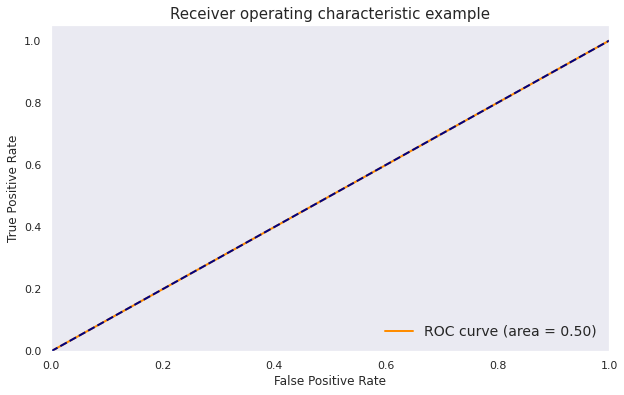

In [108]:
plot_roc(y_true_2_Xception, y_score_2_Xception)

##### 4.3.2.4 Confusion Matrix

###### 4.3.2.4.1 Defining the Confusion Matrix Function

In [109]:
def positive_negative_measurement(y_true, y_score):
    # Initialization
    TRUE_POSITIVE = 0
    FALSE_POSITIVE = 0
    TRUE_NEGATIVE = 0
    FALSE_NEGATIVE = 0
    
    # Calculating the model
    for i in range(len(y_score)):
        if y_true[i] == y_score[i] == 1:
            TRUE_POSITIVE += 1
        if (y_score[i] == 1) and (y_true[i] != y_score[i]):
            FALSE_POSITIVE += 1
        if y_true[i] == y_score[i] == 0:
            TRUE_NEGATIVE += 1
        if (y_score[i] == 0) and (y_true[i] != y_score[i]):
            FALSE_NEGATIVE += 1

    return(TRUE_POSITIVE, FALSE_POSITIVE, TRUE_NEGATIVE, FALSE_NEGATIVE)

In [110]:
TRUE_POSITIVE_Xception, FALSE_POSITIVE_Xception, TRUE_NEGATIVE_Xception, FALSE_NEGATIVE_Xception = positive_negative_measurement(y_true_2_Xception, y_score_2_Xception)
postives_negatives_Xception = [[TRUE_POSITIVE_Xception, FALSE_POSITIVE_Xception], 
                                [FALSE_NEGATIVE_Xception, TRUE_NEGATIVE_Xception]]

###### 4.3.2.4.2 Obtaining the Labels

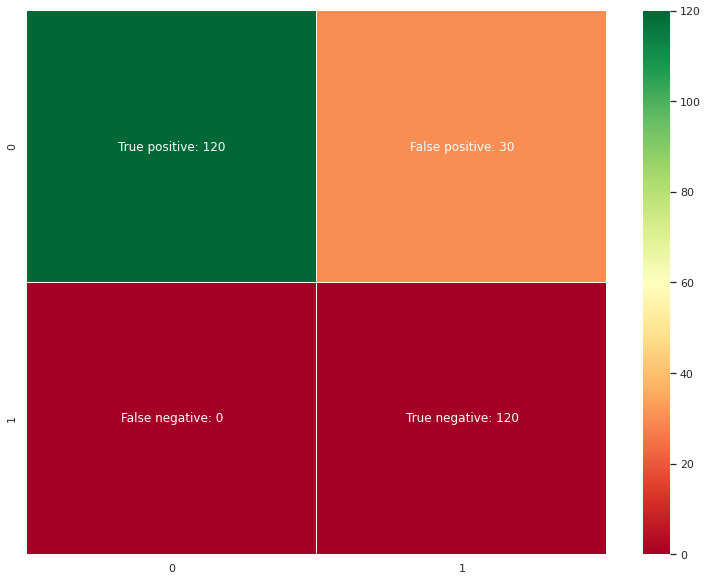

In [111]:
import seaborn as sns
sns.set()
labels_Xception =  np.array([['True positive: ' + str(TRUE_POSITIVE_Xception),
                     'False positive: ' + str(FALSE_POSITIVE_Xception)],
                    ['False negative: ' + str(FALSE_NEGATIVE_Xception),
                     'True negative: ' + str(TRUE_POSITIVE_Xception)]])
plt.figure(figsize = (13, 10))
sns.heatmap(postives_negatives_Xception, annot = labels_Xception, linewidths = 0.1, fmt="", cmap = 'RdYlGn')

###### 4.3.2.4.3 Calculating Sensitivity/Recall/Hit Rate/True Positive Rate

In [112]:
# Sensitivity | Recall | hit rate | true positive rate (TPR)
sensitivity_Xception = TRUE_POSITIVE_Xception / (TRUE_POSITIVE_Xception + FALSE_NEGATIVE_Xception)
print("Sensitivity: ", sensitivity_Xception)

Sensitivity:  1.0


###### 4.3.2.4.4 Calculating Specificity/Selectivity/True Negative Rate

In [113]:
# Specificity | selectivity | true negative rate (TNR)
try:
    specifity_Xception = TRUE_NEGATIVE_Xception / (TRUE_NEGATIVE_Xception + FALSE_NEGATIVE_Xception)
    print("Specifity: ", specifity_Xception)
except:
    print("No Specificity due to NO NEGATIVE results.")

No Specificity due to NO NEGATIVE results.


###### 4.3.2.4.5 Calculating Precision/Positive Predictive Value

In [114]:
# Precision | positive predictive value (PPV)
predcision_Xception = TRUE_POSITIVE_Xception / (TRUE_POSITIVE_Xception + FALSE_POSITIVE_Xception)
print("Precision: ", predcision_Xception)

Precision:  0.8


###### 4.3.2.4.6 Negative Predictive Value

In [115]:
# Negative predictive value (NPV)
try:
    npv_Xception = TRUE_NEGATIVE_Xception / (TRUE_NEGATIVE_Xception + FALSE_NEGATIVE_Xception)
    print("Negative predictive value: ", npv_Xception)
except:
    print("0 Negative Predictions")

0 Negative Predictions


###### 4.3.2.4.7 Calculating Accuracy

In [116]:
# Accuracy 
accuracy_Xception = (TRUE_POSITIVE_Xception + TRUE_NEGATIVE_Xception) / (TRUE_POSITIVE_Xception + FALSE_POSITIVE_Xception + TRUE_NEGATIVE_Xception + FALSE_NEGATIVE_Xception)
print("Accuracy: ", accuracy_Xception)

Accuracy:  0.8


## 5. Evaluating the Models Together on Validation Data - Ensembling the models

In [117]:
from keras.layers import Input

### 5.1 Defining the Input Shape

In [118]:
# Single input for multiple models
model_input = Input(shape=(512, 512, 3))

### 5.2 Defining all the Models

In [119]:
def mobilenet_architecture():
    """
    Pre-build architecture of mobilenet for our dataset.
    """
    # Imprting the model
    from keras.applications.mobilenet import MobileNet

    # Pre-build model
    base_model = MobileNet(include_top = False, weights = None, input_tensor = model_input)

    # Adding output layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    output = Dense(units = 2, activation = 'softmax')(x)

    # Creating the whole model
    mobilenet_model = Model(base_model.input, output)
    
    # Getting the summary of architecture
    mobilenet_model.summary()
    
    # Compiling the model
    mobilenet_model.compile(optimizer = keras.optimizers.Adam(lr = 0.001), 
                            loss = 'categorical_crossentropy', 
                            metrics = ['accuracy'])

    return mobilenet_model

In [120]:
# Model 1
mobilenet_model = mobilenet_architecture()
mobilenet_model.load_weights("/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/weights.best.mobilenet.hdf5")

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 512, 512, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 256, 256, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 256, 256, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 256, 256, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 256, 256, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 256, 256, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 256, 256, 32)      0   

In [121]:
def inception_architecture():
    """
    Pre-build architecture of inception for our dataset.
    """
    # Imprting the model 
    from keras.applications.inception_v3 import InceptionV3

    # Pre-build model
    base_model = InceptionV3(include_top = False, weights = None, input_tensor = model_input)

    # Adding output layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    output = Dense(units = 2, activation = 'softmax')(x)

    # Creating the whole model
    inception_model = Model(base_model.input, output)
    
    # Summary of the model
    inception_model.summary()
    
    # Compiling the model
    inception_model.compile(optimizer = keras.optimizers.Adam(lr = 0.001), 
                            loss = 'categorical_crossentropy', 
                            metrics = ['accuracy'])
    
    return inception_model

In [122]:
# Model 2
inception_model = inception_architecture()
inception_model.load_weights("/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/weights.best.InceptionV3.hdf5")

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv2d_294 (Conv2D)             (None, 255, 255, 32) 864         input_10[0][0]                   
__________________________________________________________________________________________________
batch_normalization_294 (BatchN (None, 255, 255, 32) 96          conv2d_294[0][0]                 
__________________________________________________________________________________________________
activation_282 (Activation)     (None, 255, 255, 32) 0           batch_normalization_294[0][0]    
___________________________________________________________________________________________

In [123]:
def xception_architecture():
    """
    Pre-build architecture of inception for our dataset.
    """
    # Imprting the model
    from keras.applications.xception import Xception

    # Pre-build model
    base_model = Xception(include_top = False, weights = None, input_tensor = model_input)

    # Adding output layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    output = Dense(units = 2, activation = 'softmax')(x)

    # Creating the whole model
    xception_model = Model(base_model.input, output)

    # Summary of the model
    xception_model.summary()
    
    # Compiling the model
    xception_model.compile(optimizer = keras.optimizers.Adam(lr = 0.001), 
                           loss = 'categorical_crossentropy', 
                           metrics = ['accuracy'])

    return xception_model

In [124]:
# Model 3
xception_model = xception_architecture()
xception_model.load_weights("/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/xception_weights.hdf5")

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 255, 255, 32) 864         input_10[0][0]                   
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 255, 255, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 255, 255, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

### 5.3 Appending All the Models

In [125]:
# Appending all models
models = [mobilenet_model, inception_model, xception_model]

### 5.4 Defining the Ensembling Function

In [126]:
def ensemble(models, model_input):
    outputs = [model.outputs[0] for model in models]
    print("Outputs: ")
    print(outputs)
    y = keras.layers.Average()(outputs)
    print("y: ")
    print(y)
    model = Model(model_input, y, name='ensemble')
    print("Model: ")
    print(model)
    return model

In [127]:
# Getting ensemble model
ensemble_model = ensemble(models, model_input)

Outputs: 
[<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense_9')>, <KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense_10')>, <KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense_11')>]
y: 
KerasTensor(type_spec=TensorSpec(shape=(None, 2), dtype=tf.float32, name=None), name='average/truediv:0', description="created by layer 'average'")
Model: 


### 5.5 Obtaing the Weights of all the Models combined

In [128]:
# average the weights of multiple loaded models
from keras.models import load_model
from keras.models import clone_model
from numpy import average
from numpy import array

In [129]:
# load models from file
def load_all_models(weight_file_names_with_path):
	all_models = list()
	for epoch in range(0,len(weight_file_names_with_path)):
		# define filename for this ensemble
		filename = weight_file_names_with_path[epoch] #'model_' + str(epoch) + '.h5'
		# load model from file
		model = load_model(filename)
		# add to list of members
		all_models.append(model)
		print('>loaded %s' % filename)
	return all_models

In [130]:
weight_file_names_with_path = ["/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/weights.best.mobilenet.hdf5","/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/weights.best.InceptionV3.hdf5","/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/xception_weights.hdf5"]

In [131]:
# load all models into memory
members = load_all_models(weight_file_names_with_path)
print('Loaded %d models' % len(members))

>loaded /content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/weights.best.mobilenet.hdf5
>loaded /content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/weights.best.InceptionV3.hdf5
>loaded /content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/xception_weights.hdf5
Loaded 3 models


In [132]:
members

In [133]:
# prepare an array of equal weights
n_models = len(members)
total_weights = [1/n_models for i in range(1, n_models+1)] #[1/3 for i in range(1,(3+1))]

In [134]:
n_models

3

In [135]:
total_weights

[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]

In [136]:
for weight in total_weights:
    weight = float(weight)

In [137]:
total_weights

[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]

In [138]:
type(total_weights)

list

In [139]:
type(total_weights[0])

float

In [140]:
new_model = None

In [141]:
weights_of_MobileNet = members[0].get_weights()
print(weights_of_MobileNet)

[array([[[[-5.78953922e-02,  1.18748240e-01, -3.58449551e-03,
           7.67400190e-02,  9.81494132e-03, -1.15358613e-01,
          -1.10970631e-01, -5.06506674e-02,  4.26641665e-02,
          -7.31739700e-02, -2.92203873e-02, -7.85549656e-02,
           5.79954758e-02, -8.35475475e-02,  5.27774692e-02,
          -2.79018320e-02,  1.88530549e-01, -3.26058343e-02,
          -2.52588727e-02,  1.08048700e-01, -4.99288365e-02,
           4.29958152e-03, -3.24650183e-02, -6.44720718e-02,
           1.96396783e-02,  1.26837507e-01, -2.57957783e-02,
          -1.12066090e-01, -2.57343482e-02, -6.24383129e-02,
          -1.29301116e-01,  6.90540299e-02],
         [ 1.38535902e-01, -8.75527784e-02,  9.13920254e-02,
           1.14842981e-01, -1.35958567e-01,  4.75775525e-02,
          -1.06878534e-01, -7.26059154e-02,  7.98232183e-02,
          -3.80829945e-02,  1.05859138e-01,  1.11101396e-01,
           5.16339242e-02,  3.77877317e-02, -1.30873367e-01,
           6.57559261e-02, -5.43464944e

In [142]:
weights_of_Inception = members[1].get_weights()
print(weights_of_Inception)

[array([[[[-1.13374693e-02,  3.06984433e-03,  1.19624861e-01,
          -1.27234325e-01, -1.21250302e-01,  1.29275501e-01,
          -1.14875987e-01,  7.76548386e-02, -8.05753171e-02,
           1.22236781e-01,  5.23569658e-02, -7.93023556e-02,
           9.97732058e-02,  9.21412895e-04,  9.56521109e-02,
          -7.68207237e-02,  4.52431925e-02,  6.09006360e-02,
          -1.67526081e-02,  7.27995187e-02, -5.98577745e-02,
          -1.24826856e-01,  1.35306552e-01, -1.40773254e-02,
          -1.13930829e-01, -9.68974307e-02, -6.30708039e-02,
           5.09165153e-02,  6.98874425e-03, -3.04568894e-02,
           1.31669030e-01,  1.08959146e-01],
         [ 4.70227040e-02,  1.33584827e-01,  7.87621439e-02,
           1.27831129e-02, -7.47018382e-02,  7.97381252e-02,
           1.19798943e-01,  5.68956658e-02, -1.10456973e-01,
           8.78047124e-02,  8.23621303e-02, -9.70347151e-02,
          -4.37709987e-02,  1.33332238e-01, -3.57325934e-02,
           1.45638108e-01,  1.54369567e

In [143]:
weights_of_Xception = members[2].get_weights()
print(weights_of_Xception)

[array([[[[ 1.07578978e-01,  3.94345075e-02,  8.33318383e-02,
          -4.59231474e-02, -2.32510902e-02, -1.95185505e-02,
          -6.59797192e-02, -6.50377646e-02,  5.20554744e-02,
          -9.22507718e-02, -5.67423999e-02, -3.62460539e-02,
          -5.33234403e-02, -8.99340510e-02, -1.28130943e-01,
          -7.14906007e-02, -7.43175149e-02,  1.59331113e-01,
           4.51132767e-02, -2.01273765e-02, -8.64424482e-02,
           9.65051167e-03,  1.11119136e-01,  1.48881331e-01,
           9.60314125e-02, -1.13026857e-01,  1.34285226e-01,
           1.23990498e-01,  7.77580589e-02,  7.05895051e-02,
          -2.62659546e-02,  2.51497771e-03],
         [ 5.03223240e-02,  6.86411513e-03,  1.14050016e-01,
          -2.43194774e-02, -1.09989010e-01,  9.03110057e-02,
           6.04383051e-02, -4.93185874e-03, -3.79448831e-02,
           1.04210064e-01,  7.84342811e-02, -2.62572765e-02,
          -4.10708375e-02,  4.97337468e-02, -1.57468189e-02,
          -6.75764605e-02, -8.49145502e

In [144]:
# # np.concatenate(weights_of_MobileNet,weights_of_Inception)
# # using naive method to concat
# for i in weights_of_Inception :
#     weights_of_MobileNet.append(i)
# # weights_of_MobileNet_and_Inception = weights_of_MobileNet.append(weights_of_Inception)
# print("weights_of_MobileNet_and_Inception: ")
# print(weights_of_MobileNet)

In [145]:
# # np.concatenate(weights_of_MobileNet,weights_of_Inception)
# # using naive method to concat
# for i in weights_of_Xception :
#     weights_of_MobileNet.append(i)
# # weights_of_MobileNet_and_Inception = weights_of_MobileNet.append(weights_of_Inception)
# print("weights_of_MobileNet_and_Inception: ")
# print(weights_of_MobileNet)

In [146]:
print(type(weights_of_MobileNet))

<class 'list'>


In [147]:
weights_of_MobileNet_and_Inception = np.concatenate((weights_of_MobileNet[0], weights_of_Inception[0]))
print(type(weights_of_MobileNet_and_Inception))

<class 'numpy.ndarray'>


In [148]:
print(weights_of_MobileNet_and_Inception.shape)

(6, 3, 3, 32)


In [149]:
weights_of_MobileNet_Inception_and_Xception = c = np.concatenate((weights_of_MobileNet_and_Inception, weights_of_Xception[0])) #np.stack((weights_of_MobileNet_and_Inception,b), axis=3) 
print(type(weights_of_MobileNet_Inception_and_Xception))
print(weights_of_MobileNet_Inception_and_Xception.shape)

<class 'numpy.ndarray'>
(9, 3, 3, 32)


In [150]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json

In [151]:
# serialize model to JSON
model_weights_for_json = ensemble_model.to_json()
with open("/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/Ensemble Model/ensemble_model.json", "w") as json_file:
    json_file.write(model_weights_for_json)
# serialize weights to HDF5
ensemble_model.save_weights("/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/Ensemble Model/ensemble_model.h5")
print("Saved model to disk")

Saved model to disk


In [152]:
# #create a model from the weights of multiple models
# def model_weight_ensemble(members, weights):
#     #determine how many layers need to be averaged
#     n_layers = len(members[0].get_weights())
#     print("No. of Layers which need to be averaged: ")
#     print(n_layers)
#     print("The weights of the Member 0 are: ")
#     print(members[0].get_weights())
#     # avg_model_weights = list()
#     # for weight in weights:
#     #     weight = float(weight)
#     # for layer in range(n_layers):
#     #     #collect this layer from each model
#     #     layer_weights = array([model.get_weights()[layer] for model in members])
#     #     # weighted average of weights for this layer
#     #     avg_layer_weights = average(layer_weights, axis = 0, weights=weights)
#     #     #store average layer weights
#     #     avg_model_weights.append(avg_layer_weights)
#     # # create a new model with the same structure
#     # model = clone_model(members[0])
#     # # set the weights in the new
#     # model.set_weights(avg_model_weights)
#     # model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#     return model

In [153]:
# create a new model with the weighted average of all model weights
# new_model = model_weight_ensemble(members, weights)

In [154]:
# new_model

In [155]:
# # summarize the created model
# new_model.summary()

### 5.5 Evaluating ensemble model

In [156]:
# Compute test set predictions
NUMBER_TEST_SAMPLES_Ensemble = 150

y_true_Ensemble = valid_targets[:NUMBER_TEST_SAMPLES_Ensemble]
y_score_Ensemble = []
for index in range(NUMBER_TEST_SAMPLES_Ensemble): #compute one at a time due to memory constraints
    image_to_predict_Ensemble = path_to_tensor(validation_files[index]).astype("float32")/255.
    probs_Ensemble = ensemble_model.predict(image_to_predict_Ensemble,)
    if np.argmax(probs_Ensemble) == 0:
        y_score_Ensemble.append([1., 0.])
    elif np.argmax(probs_Ensemble) == 1:
        y_score_Ensemble.append([0., 1.])
    print("Predicted value {}... ".format(index+1) + " Melanoma : ", probs_Ensemble[0][0],  " | Other : ", probs_Ensemble[0][1])
    print("Real values {}...".format(index+1) + "      Melanoma : ", valid_targets[index][0], "      | Other : ", valid_targets[index][1])
    print("---------------------------------------------------------------------------")
    
    
correct_Ensemble = np.array(y_true_Ensemble) == np.array(y_score_Ensemble)

Predicted value 1...  Melanoma :  0.76818436  | Other :  0.2318157
Real values 1...      Melanoma :  1.0       | Other :  0.0
---------------------------------------------------------------------------
Predicted value 2...  Melanoma :  0.7586271  | Other :  0.24137294
Real values 2...      Melanoma :  1.0       | Other :  0.0
---------------------------------------------------------------------------
Predicted value 3...  Melanoma :  0.7656678  | Other :  0.23433225
Real values 3...      Melanoma :  1.0       | Other :  0.0
---------------------------------------------------------------------------
Predicted value 4...  Melanoma :  0.76913106  | Other :  0.23086894
Real values 4...      Melanoma :  1.0       | Other :  0.0
---------------------------------------------------------------------------
Predicted value 5...  Melanoma :  0.75429773  | Other :  0.24570227
Real values 5...      Melanoma :  1.0       | Other :  0.0
----------------------------------------------------------------

In [157]:
print("Accuracy = %2.2f%%" % (np.mean(correct_Ensemble)*100))

Accuracy = 80.00%


In [158]:
image_to_predict_Ensemble = path_to_tensor("/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Output_melanoma/ISIC_0000000_180_angle_flipped.jpg").astype('float32')/255.
ensemble_model.predict(image_to_predict_Ensemble)

array([[0.7623098 , 0.23769021]], dtype=float32)

#### 5.5.1 Compute Test Set Predictions

In [159]:
def predict_ensemble(img_path,
            model_architecture = model_architecture, 
            path_model_weight = weight_path):
    # Printing the information passed to the Predict Function
    print("Image Path: ")
    print(img_path)
    print("Arhitecture Used:")
    print(model_architecture)
    print("Path for Model Weights: ")
    print(path_model_weight)
    # Getting the tensor of image
    image_to_predict = path_to_tensor(img_path).astype('float32')/255
    # Getting the model's architecture
    model = model_architecture
    # Loading the weights
    model.load_weights(path_model_weight)
    # printing the weights
    print("Model Weights: ")
    print(model.load_weights(path_model_weight))
    # Predicting
    pred = model.predict(image_to_predict)
    print("Prediction..." + " Melanoma : ", pred[0][0], " | Other : ", pred[0][1])
    predict_0_0 = pred[0][0]
    predict_0_1 = pred[0][1]
    if np.argmax(pred) == 0:
        return [1., 0.]
    elif np.argmax(pred) == 1:
        return [0., 1.]

In [160]:
# Compute test set predictions
#model_architecture,path_model_weight
NUMBER_TEST_SAMPLES_Ensemble = 150

all_weights_combined_as_list = weights_of_MobileNet_Inception_and_Xception

y_true_Ensemble = valid_targets[:NUMBER_TEST_SAMPLES_Ensemble]
y_score_Ensemble = []
for index in range(NUMBER_TEST_SAMPLES_Ensemble): #compute one at a time due to memory constraints
    probs_Ensemble = predict_ensemble(img_path = validation_files[index], model_architecture = ensemble_model, path_model_weight = "/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/Ensemble Model/ensemble_model.h5")
    print("Real values {}...".format(index+1) + "Melanoma : ", valid_targets[index][0], " | Other : ", valid_targets[index][1])
    print("---------------------------------------------------------------------------")
    y_score_Ensemble.append(probs_Ensemble)
    
correct_Ensemble = np.array(y_true_Ensemble) == np.array(y_score_Ensemble)

Image Path: 
/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Validation_Data/Data Image JPG/ISIC_0004337.jpg
Arhitecture Used:
Path for Model Weights: 
/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/Ensemble Model/ensemble_model.h5
Model Weights: 
None
Prediction... Melanoma :  0.76818436  | Other :  0.2318157
Real values 1...Melanoma :  1.0  | Other :  0.0
---------------------------------------------------------------------------
Image Path: 
/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Validation_Data/Data Image JPG/ISIC_0001769.jpg
Arhitecture Used:
Path for Model Weights: 
/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/Ensemble Model/ensemble_model.h5
Model Weights: 
None
Prediction... Melanoma :  0.7586271  | Other :  0.24137294
Real values 2...Melanoma :  1.0  | Other :  0.0
---------------------------------------------------------------------------
Image Path: 
/content/drive/

In [161]:
print("Accuracy = %2.2f%%" % (np.mean(correct_Ensemble)*100))

Accuracy = 80.00%


#### 5.5.2 Evaluating the Model

##### 5.5.2.1 Re-ordering the Actual y for ROC

In [162]:
# Re-ordering the actual y (for ROC)
y_true_2_Ensemble = []
for i in range(len(y_true_Ensemble)):
    y_true_2_Ensemble.append(y_true_Ensemble[i][0])

##### 5.5.2.2 Re-ordering the Predict y for ROC

In [163]:
# Re-ordering the predicte y (for ROC)
y_score_2_Ensemble = []
for i in range(len(y_score_Ensemble)):
    y_score_2_Ensemble.append(y_score_Ensemble[i][0])

##### 5.5.2.3 Plotting the Re-ordered ROC

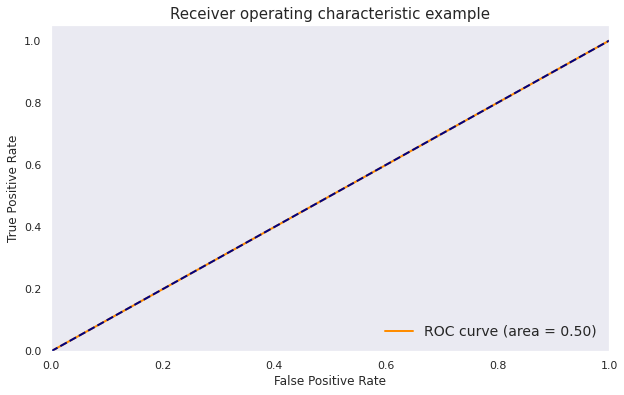

In [164]:
plot_roc(y_true_2_Ensemble, y_score_2_Ensemble)

##### 5.5.2.4 Confusion Matrix

###### 5.5.2.4.1 Defining the Confusion Matrix Function

In [165]:
def positive_negative_measurement(y_true, y_score):
    # Initialization
    TRUE_POSITIVE = 0
    FALSE_POSITIVE = 0
    TRUE_NEGATIVE = 0
    FALSE_NEGATIVE = 0
    
    # Calculating the model
    for i in range(len(y_score)):
        if y_true[i] == y_score[i] == 1:
            TRUE_POSITIVE += 1
        if (y_score[i] == 1) and (y_true[i] != y_score[i]):
            FALSE_POSITIVE += 1
        if y_true[i] == y_score[i] == 0:
            TRUE_NEGATIVE += 1
        if (y_score[i] == 0) and (y_true[i] != y_score[i]):
            FALSE_NEGATIVE += 1

    return(TRUE_POSITIVE, FALSE_POSITIVE, TRUE_NEGATIVE, FALSE_NEGATIVE)

In [166]:
TRUE_POSITIVE_Ensemble, FALSE_POSITIVE_Ensemble, TRUE_NEGATIVE_Ensemble, FALSE_NEGATIVE_Ensemble = positive_negative_measurement(y_true_2_Ensemble, y_score_2_Ensemble)
postives_negatives_Ensemble = [[TRUE_POSITIVE_Ensemble, FALSE_POSITIVE_Ensemble], 
                                [FALSE_NEGATIVE_Ensemble, TRUE_NEGATIVE_Ensemble]]

###### 5.5.2.4.2 Obtaining the Labels

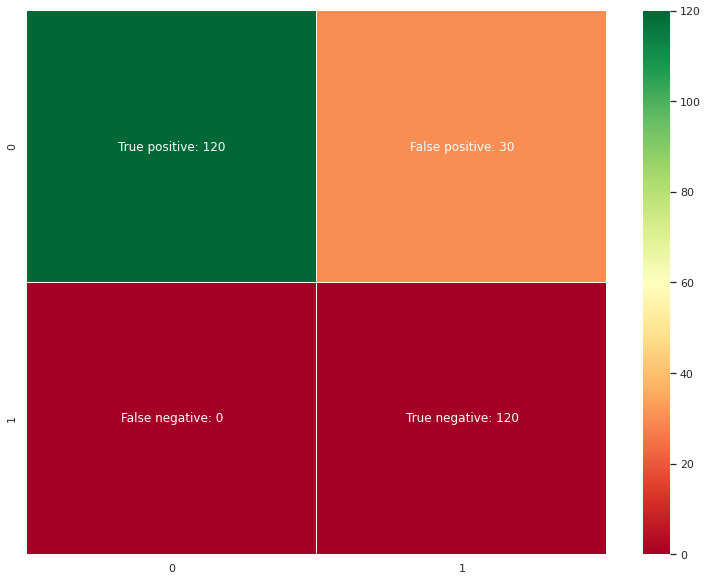

In [167]:
import seaborn as sns
sns.set()
labels_Ensemble =  np.array([['True positive: ' + str(TRUE_POSITIVE_Ensemble),
                     'False positive: ' + str(FALSE_POSITIVE_Ensemble)],
                    ['False negative: ' + str(FALSE_NEGATIVE_Ensemble),
                     'True negative: ' + str(TRUE_POSITIVE_Ensemble)]])
plt.figure(figsize = (13, 10))
sns.heatmap(postives_negatives_Ensemble, annot = labels_Ensemble, linewidths = 0.1, fmt="", cmap = 'RdYlGn')

###### 5.5.2.4.3 Calculating Sensitivity/Recall/Hit Rate/True Positive Rate

In [168]:
# Sensitivity | Recall | hit rate | true positive rate (TPR)
sensitivity_Ensemble = TRUE_POSITIVE_Ensemble / (TRUE_POSITIVE_Ensemble + FALSE_NEGATIVE_Ensemble)
print("Sensitivity: ", sensitivity_Ensemble)

Sensitivity:  1.0


###### 5.5.2.4.4 Calculating Specificity/Selectivity/True Negative Rate

In [169]:
# Specificity | selectivity | true negative rate (TNR)
try:
    specifity_Ensemble = TRUE_NEGATIVE_Ensemble / (TRUE_NEGATIVE_Ensemble + FALSE_NEGATIVE_Ensemble)
    print("Specifity: ", specifity_Ensemble)
except:
    print("No Specificity due to NO NEGATIVE results.")

No Specificity due to NO NEGATIVE results.


###### 5.5.2.4.5 Calculating Precision/Positive Predictive Value

In [170]:
# Precision | positive predictive value (PPV)
predcision_Ensemble = TRUE_POSITIVE_Ensemble / (TRUE_POSITIVE_Ensemble + FALSE_POSITIVE_Ensemble)
print("Precision: ", predcision_Ensemble)

Precision:  0.8


###### 5.5.2.4.6 Negative Predictive Value

In [171]:
# Negative predictive value (NPV)
try:
    npv_Ensemble = TRUE_NEGATIVE_Ensemble / (TRUE_NEGATIVE_Ensemble + FALSE_NEGATIVE_Ensemble)
    print("Negative predictive value: ", npv_Ensemble)
except:
    print("0 Negative Predictions")

0 Negative Predictions


###### 5.5.2.4.7 Calculating Accuracy

In [172]:
# Accuracy 
accuracy_Ensemble = (TRUE_POSITIVE_Ensemble + TRUE_NEGATIVE_Ensemble) / (TRUE_POSITIVE_Ensemble + FALSE_POSITIVE_Ensemble + TRUE_NEGATIVE_Ensemble + FALSE_NEGATIVE_Ensemble)
print("Accuracy: ", accuracy_Ensemble)

Accuracy:  0.8


## 6. Evaluating the Models Individually on Testing Data

In [173]:
# Importing the libraries
from sklearn.metrics import roc_curve, auc
import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

#### Defining Function to calculatae Receiving Operating Characteristic curve

In [174]:
def compute_roc(y_true, y_score):
    """ 
    Computing the "Receiving Operating Characteristic curve" and area
    """
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_true, y_score) 
    auroc = auc(false_positive_rate, true_positive_rate) 
    return false_positive_rate, true_positive_rate, auroc

#### Defining Function for Plotting the Receiving Operating Characteristic curve

In [175]:
def plot_roc(y_true, y_score):
    """ 
    Ploting the Receiving Operating Characteristic curve
    """
    false_positive_rate, true_positive_rate, auroc = compute_roc(y_true, y_score)
    plt.figure(figsize=(10,6))
    plt.grid()
    plt.plot(false_positive_rate, 
             true_positive_rate, 
             color='darkorange',
             lw=2, 
             label='ROC curve (area = {:.2f})'.format(auroc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('Receiver operating characteristic example', fontsize=15)
    plt.legend(loc="lower right", fontsize=14)
    plt.show()

In [176]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [177]:
plt.style.use("seaborn-white")

### 6.1 MobileNet Architecture

#### 6.1.1 Computing Test Set Predictions

In [178]:
print("No. of Files in Test Data")
print(len(test_files))
print("No. of Target Values in Test Data")
print(len(test_targets))

No. of Files in Test Data
600
No. of Target Values in Test Data
600


In [179]:
# Compute test set predictions
NUMBER_TEST_SAMPLES_MobileNet_Test = 600

mobilenet_architecture_function = mobilenet_architecture()
mobilenet_architecture_weight_path = "/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/weights.best.mobilenet.hdf5"

y_true_MobileNet_Test = test_targets[:NUMBER_TEST_SAMPLES_MobileNet_Test]
print(y_true_MobileNet_Test)

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 512, 512, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 256, 256, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 256, 256, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 256, 256, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 256, 256, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 256, 256, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 256, 256, 32)      0  

In [180]:
y_score_MobileNet_Test = []
count = 0
for index in range(NUMBER_TEST_SAMPLES_MobileNet_Test): #compute one at a time due to memory constraints
    count = count+1
    print(count)
    probs_MobileNet_Test = predict(img_path = test_files[index], model_architecture = mobilenet_architecture_function, path_model_weight = mobilenet_architecture_weight_path)
    print("Real values..." + "Melanoma : ", test_targets[index][0], " | Other : ", test_targets[index][1])
    print("---------------------------------------------------------------------------")
    y_score_MobileNet_Test.append(probs_MobileNet_Test)
    
correct_MobileNet_Test = np.array(y_true_MobileNet_Test) == np.array(y_score_MobileNet_Test)

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/weights.best.mobilenet.hdf5
Model Weights: 
None
Prediction... Melanoma :  0.7077316  | Other :  0.29226843
Real values...Melanoma :  1.0  | Other :  0.0
---------------------------------------------------------------------------
147
Image Path: /content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Test_v2_Data/Data Image JPG/ISIC_0013891.jpg
Arhitecture Used:
Path for Model Weights: 
/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/weights.best.mobilenet.hdf5
Model Weights: 
None
Prediction... Melanoma :  0.70597875  | Other :  0.29402125
Real values...Melanoma :  0.0  | Other :  1.0
---------------------------------------------------------------------------
148
Image Path: /content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Test_v2_Data/Data Image JPG/ISIC_0013998.jpg
Arhitecture Used:
Path for Model 

In [181]:
print("Accuracy = %2.2f%%" % (np.mean(correct_MobileNet_Test)*100))

Accuracy = 80.50%


#### 6.1.2 Re-ordering Actual y for ROC

In [182]:
# Re-ordering the actual y (for ROC)
y_true_2_MobileNet_Test = []
for i in range(len(y_true_MobileNet_Test)):
    y_true_2_MobileNet_Test.append(y_true_MobileNet_Test[i][0])

#### 6.1.3 Re-ordering Predicte y for ROC

In [183]:
# Re-ordering the predicte y (for ROC)
y_score_2_MobileNet_Test = []
for i in range(len(y_score_MobileNet_Test)):
    y_score_2_MobileNet_Test.append(y_score_MobileNet_Test[i][0])

#### 6.1.4 Plotting the Re-ordered ROC

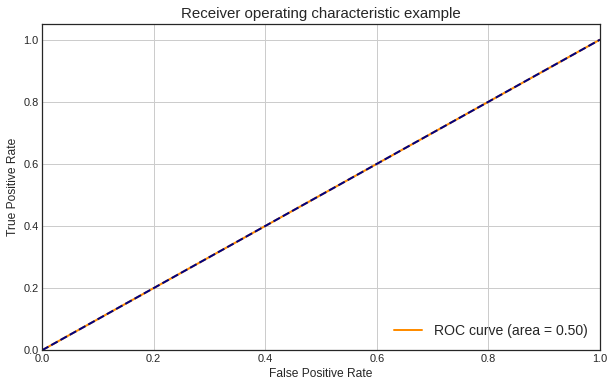

In [184]:
plot_roc(y_true_2_MobileNet_Test, y_score_2_MobileNet_Test)

#### 6.1.5 Confusion Matrix

##### 6.1.5.1 Defining the Confusion Matrix Function

In [185]:
def positive_negative_measurement(y_true, y_score):
    # Initialization
    TRUE_POSITIVE = 0
    FALSE_POSITIVE = 0
    TRUE_NEGATIVE = 0
    FALSE_NEGATIVE = 0
    
    # Calculating the model
    for i in range(len(y_score)):
        if y_true[i] == y_score[i] == 1:
            TRUE_POSITIVE += 1
        if (y_score[i] == 1) and (y_true[i] != y_score[i]):
            FALSE_POSITIVE += 1
        if y_true[i] == y_score[i] == 0:
            TRUE_NEGATIVE += 1
        if (y_score[i] == 0) and (y_true[i] != y_score[i]):
            FALSE_NEGATIVE += 1

    return(TRUE_POSITIVE, FALSE_POSITIVE, TRUE_NEGATIVE, FALSE_NEGATIVE)

In [186]:
TRUE_POSITIVE_MobileNet_Test, FALSE_POSITIVE_MobileNet_Test, TRUE_NEGATIVE_MobileNet_Test, FALSE_NEGATIVE_MobileNet_Test = positive_negative_measurement(y_true_2_MobileNet_Test, y_score_2_MobileNet_Test)
postives_negatives_MobileNet_Test = [[TRUE_POSITIVE_MobileNet_Test, FALSE_POSITIVE_MobileNet_Test], 
                                     [FALSE_NEGATIVE_MobileNet_Test, TRUE_NEGATIVE_MobileNet_Test]]

In [187]:
postives_negatives_MobileNet_Test

[[483, 117], [0, 0]]

##### 6.1.5.2 Obtaining Labels

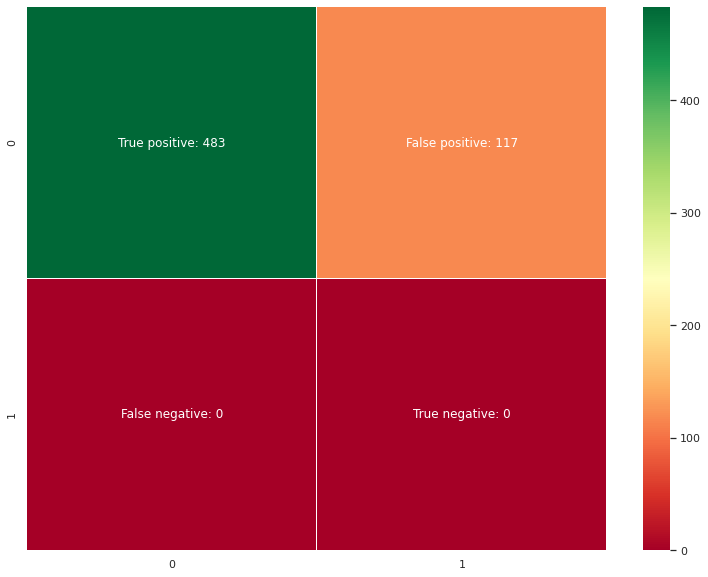

In [188]:
import seaborn as sns
sns.set()
labels_MobileNet_Test =  np.array([['True positive: ' + str(TRUE_POSITIVE_MobileNet_Test),
                                    'False positive: ' + str(FALSE_POSITIVE_MobileNet_Test)],
                                    ['False negative: ' + str(FALSE_NEGATIVE_MobileNet_Test),
                                    'True negative: ' + str(TRUE_NEGATIVE_MobileNet_Test)]])
plt.figure(figsize = (13, 10))
sns.heatmap(postives_negatives_MobileNet_Test, annot = labels_MobileNet_Test, linewidths = 0.1, fmt="", cmap = 'RdYlGn')

In [189]:
labels_MobileNet_Test

array([['True positive: 483', 'False positive: 117'],
       ['False negative: 0', 'True negative: 0']], dtype='<U19')

##### 6.1.5.3 Calculating Sensitivity/Recall/Hit Rate/True Positive Rate

In [190]:
# Sensitivity | Recall | hit rate | true positive rate (TPR)
sensitivity_MobileNet_Test = TRUE_POSITIVE_MobileNet_Test / (TRUE_POSITIVE_MobileNet_Test + FALSE_NEGATIVE_MobileNet_Test)
print("Sensitivity: ", sensitivity_MobileNet_Test)

Sensitivity:  1.0


##### 6.1.5.4 Calculating Specificity/Selectivity/True Negative Rate

In [191]:
# Specificity | selectivity | true negative rate (TNR)
try:
    specifity_MobileNet_Test = TRUE_NEGATIVE_MobileNet_Test / (TRUE_NEGATIVE_MobileNet_Test + FALSE_NEGATIVE_MobileNet_Test)
    print("Specifity: ", specifity_MobileNet_Test)
except:
    print("No Specificity due to NO NEGATIVE results.")

No Specificity due to NO NEGATIVE results.


##### 6.1.5.5 Calculating Precision/Positive Predictive Value

In [192]:
# Precision | positive predictive value (PPV)
predcision_MobileNet_Test = TRUE_POSITIVE_MobileNet_Test / (TRUE_POSITIVE_MobileNet_Test + FALSE_POSITIVE_MobileNet_Test)
print("Precision: ", predcision_MobileNet_Test)

Precision:  0.805


##### 6.1.5.6 Calculating Negative Predictive Value

In [193]:
# Negative predictive value (NPV)
try:
    npv_MobileNet_Test = TRUE_NEGATIVE_MobileNet_Test / (TRUE_NEGATIVE_MobileNet_Test + FALSE_NEGATIVE_MobileNet_Test)
    print("Negative predictive value: ", npv_MobileNet_Test)
except:
    print("0 Negative Predictions")

0 Negative Predictions


##### 6.1.5.7 Calculating Accuracy

In [194]:
# Accuracy 
accuracy_MobileNet_Test = (TRUE_POSITIVE_MobileNet_Test + TRUE_NEGATIVE_MobileNet_Test) / (TRUE_POSITIVE_MobileNet_Test + FALSE_POSITIVE_MobileNet_Test + TRUE_NEGATIVE_MobileNet_Test + FALSE_NEGATIVE_MobileNet_Test)
print("Accuracy: ", accuracy_MobileNet_Test)

Accuracy:  0.805


### 6.2 Inception Architecture

#### 6.2.1 Compute Test Set Predictions

In [195]:
# Compute test set predictions
NUMBER_TEST_SAMPLES_Inception_Test = 600

inception_architecture_function = inception_architecture()
inception_architecture_weight_path = "/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/weights.best.InceptionV3.hdf5"

y_true_Inception_Test = test_targets[:NUMBER_TEST_SAMPLES_Inception_Test]
y_score_Inception_Test = []
for index in range(NUMBER_TEST_SAMPLES_Inception_Test): #compute one at a time due to memory constraints
    probs_Inception_Test = predict(img_path = test_files[index], model_architecture = inception_architecture_function, path_model_weight = inception_architecture_weight_path)
    print("Real values {}...".format(index+1) + "Melanoma : ", test_targets[index][0], " | Other : ", test_targets[index][1])
    print("---------------------------------------------------------------------------")
    y_score_Inception_Test.append(probs_Inception_Test)
    
correct_Inception_Test = np.array(y_true_Inception_Test) == np.array(y_score_Inception_Test)

Streaming output truncated to the last 5000 lines.
Image Path: /content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Test_v2_Data/Data Image JPG/ISIC_0013414.jpg
Arhitecture Used:
Path for Model Weights: 
/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/weights.best.InceptionV3.hdf5
Model Weights: 
None
Prediction... Melanoma :  0.7953263  | Other :  0.2046737
Real values 101...Melanoma :  0.0  | Other :  1.0
---------------------------------------------------------------------------
Image Path: /content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Test_v2_Data/Data Image JPG/ISIC_0013325.jpg
Arhitecture Used:
Path for Model Weights: 
/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/weights.best.InceptionV3.hdf5
Model Weights: 
None
Prediction... Melanoma :  0.7861233  | Other :  0.2138768
Real values 102...Melanoma :  1.0  | Other :  0.0
-----------------------------------------------------------------

In [196]:
print("Accuracy = %2.2f%%" % (np.mean(correct_Inception_Test)*100))

Accuracy = 80.50%


#### 6.2.2 Evaluating the Model

##### 6.2.2.1 Re-ordering the Actual y for ROC

In [197]:
# Re-ordering the actual y (for ROC)
y_true_2_Inception_Test = []
for i in range(len(y_true_Inception_Test)):
    y_true_2_Inception_Test.append(y_true_Inception_Test[i][0])

##### 6.2.2.2 Re-ordering the Predicte y for ROC

In [198]:
# Re-ordering the predicte y (for ROC)
y_score_2_Inception_Test = []
for i in range(len(y_score_Inception_Test)):
    y_score_2_Inception_Test.append(y_score_Inception_Test[i][0])

##### 6.2.2.3 Plotting the Re-ordered ROC

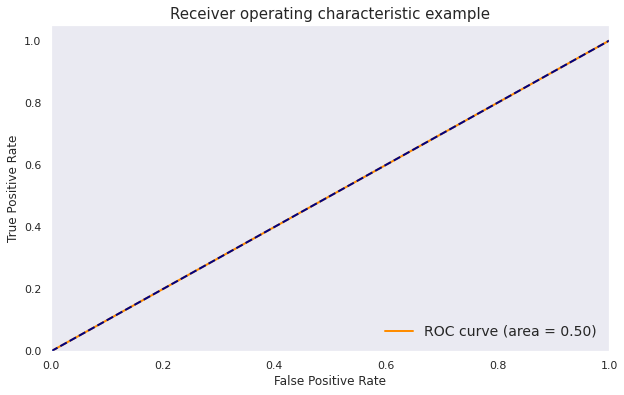

In [199]:
plot_roc(y_true_2_Inception_Test, y_score_2_Inception_Test)

##### 6.2.2.4 Confusion Matrix

###### 6.2.2.4.1 Defining the Confusion Matrix Function

In [200]:
def positive_negative_measurement(y_true, y_score):
    # Initialization
    TRUE_POSITIVE = 0
    FALSE_POSITIVE = 0
    TRUE_NEGATIVE = 0
    FALSE_NEGATIVE = 0
    
    # Calculating the model
    for i in range(len(y_score)):
        if y_true[i] == y_score[i] == 1:
            TRUE_POSITIVE += 1
        if (y_score[i] == 1) and (y_true[i] != y_score[i]):
            FALSE_POSITIVE += 1
        if y_true[i] == y_score[i] == 0:
            TRUE_NEGATIVE += 1
        if (y_score[i] == 0) and (y_true[i] != y_score[i]):
            FALSE_NEGATIVE += 1

    return(TRUE_POSITIVE, FALSE_POSITIVE, TRUE_NEGATIVE, FALSE_NEGATIVE)

###### 6.2.2.4.2 Obtaining Labels

In [201]:
TRUE_POSITIVE_Inception_Test, FALSE_POSITIVE_Inception_Test, TRUE_NEGATIVE_Inception_Test, FALSE_NEGATIVE_Inception_Test = positive_negative_measurement(y_true_2_Inception_Test, y_score_2_Inception_Test)
postives_negatives_Inception_Test = [[TRUE_POSITIVE_Inception_Test, FALSE_POSITIVE_Inception_Test], 
                                     [FALSE_NEGATIVE_Inception_Test, TRUE_NEGATIVE_Inception_Test]]

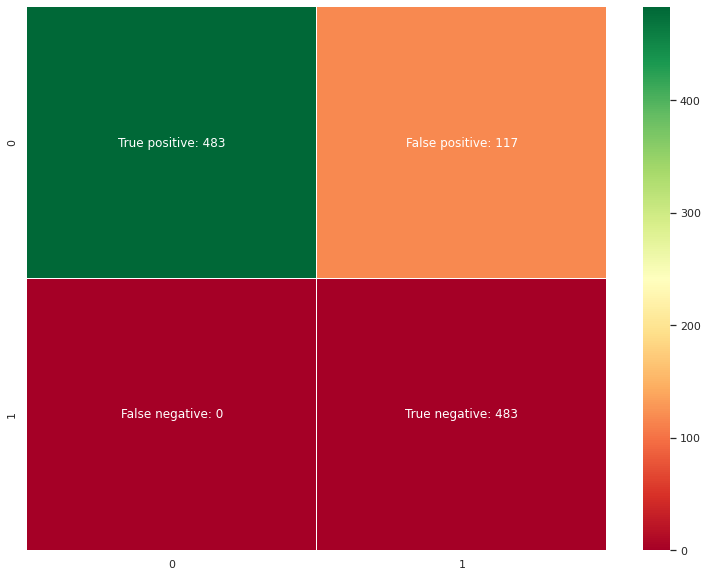

In [202]:
import seaborn as sns
sns.set()
labels_Inception_Test =  np.array([['True positive: ' + str(TRUE_POSITIVE_Inception_Test),
                                    'False positive: ' + str(FALSE_POSITIVE_Inception_Test)],
                                    ['False negative: ' + str(FALSE_NEGATIVE_Inception_Test),
                                    'True negative: ' + str(TRUE_POSITIVE_Inception_Test)]])
plt.figure(figsize = (13, 10))
sns.heatmap(postives_negatives_Inception_Test, annot = labels_Inception_Test, linewidths = 0.1, fmt="", cmap = 'RdYlGn')

###### 6.2.2.4.3 Calculating Sensitivity/Recall/Hit Rate/True Positive Rate

In [203]:
# Sensitivity | Recall | hit rate | true positive rate (TPR)
sensitivity_Inception_Test = TRUE_POSITIVE_Inception_Test / (TRUE_POSITIVE_Inception_Test + FALSE_NEGATIVE_Inception_Test)
print("Sensitivity: ", sensitivity_Inception_Test)

Sensitivity:  1.0


###### 6.2.2.4.4 Calculating Specificity/Selectivity/True Negative Rate

In [204]:
# Specificity | selectivity | true negative rate (TNR)
try:
    specifity_Inception_Test = TRUE_NEGATIVE_Inception_Test / (TRUE_NEGATIVE_Inception_Test + FALSE_NEGATIVE_Inception_Test)
    print("Specifity: ", specifity_Inception_Test)
except:
    print("No Specificity due to NO NEGATIVE results.")

No Specificity due to NO NEGATIVE results.


###### 6.2.2.4.5 Calculating Precision/Positive Predictive Value

In [205]:
# Precision | positive predictive value (PPV)
predcision_Inception_Test = TRUE_POSITIVE_Inception_Test / (TRUE_POSITIVE_Inception_Test + FALSE_POSITIVE_Inception_Test)
print("Precision: ", predcision_Inception_Test)

Precision:  0.805


###### 6.2.2.4.6 Negative Predictive Value

In [206]:
# Negative predictive value (NPV)
try:
    npv_Inception_Test = TRUE_NEGATIVE_Inception_Test / (TRUE_NEGATIVE_Inception_Test + FALSE_NEGATIVE_Inception_Test)
    print("Negative predictive value: ", npv_Inception_Test)
except:
    print("0 Negative Predictions")

0 Negative Predictions


###### 6.2.2.4.7 Calculating Accuracy

In [207]:
# Accuracy 
accuracy_Inception_Test = (TRUE_POSITIVE_Inception_Test + TRUE_NEGATIVE_Inception_Test) / (TRUE_POSITIVE_Inception_Test + FALSE_POSITIVE_Inception_Test + TRUE_NEGATIVE_Inception_Test + FALSE_NEGATIVE_Inception_Test)
print("Accuracy: ", accuracy_Inception_Test)

Accuracy:  0.805


### 6.3 Xception Architecture

#### 6.3.1 Compute Test Set Predictions

In [208]:
# Compute test set predictions
NUMBER_TEST_SAMPLES_Xception_Test = 600

xception_architecture_function = xception_architecture()
xception_architecture_weight_path = "/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/xception_weights.hdf5"


y_true_Xception_Test = test_targets[:NUMBER_TEST_SAMPLES_Xception_Test]
y_score_Xception_Test = []
for index in range(NUMBER_TEST_SAMPLES_Xception_Test): #compute one at a time due to memory constraints
    probs_Xception_Test = predict(img_path = test_files[index], model_architecture = xception_architecture_function, path_model_weight = xception_architecture_weight_path)
    print("Real values {}...".format(index+1) + "Melanoma : ", test_targets[index][0], " | Other : ", test_targets[index][1])
    print("---------------------------------------------------------------------------")
    y_score_Xception_Test.append(probs_Xception_Test)
    
correct_Xception_Test = np.array(y_true_Xception_Test) == np.array(y_score_Xception_Test)

Streaming output truncated to the last 5000 lines.
Image Path: /content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Test_v2_Data/Data Image JPG/ISIC_0013414.jpg
Arhitecture Used:
Path for Model Weights: 
/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/xception_weights.hdf5
Model Weights: 
None
Prediction... Melanoma :  0.80543476  | Other :  0.19456519
Real values 101...Melanoma :  0.0  | Other :  1.0
---------------------------------------------------------------------------
Image Path: /content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Test_v2_Data/Data Image JPG/ISIC_0013325.jpg
Arhitecture Used:
Path for Model Weights: 
/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/xception_weights.hdf5
Model Weights: 
None
Prediction... Melanoma :  0.8055548  | Other :  0.19444521
Real values 102...Melanoma :  1.0  | Other :  0.0
---------------------------------------------------------------------------
Im

In [209]:
print("Accuracy = %2.2f%%" % (np.mean(correct_Xception_Test)*100))

Accuracy = 80.50%


#### 6.3.2 Evaluating the Model

##### 6.3.2.1 Re-ordering the Actual y for ROC

In [210]:
# Re-ordering the actual y (for ROC)
y_true_2_Xception_Test = []
for i in range(len(y_true_Xception_Test)):
    y_true_2_Xception_Test.append(y_true_Xception_Test[i][0])

##### 6.3.2.2 Re-ordering the Predict y for ROC

In [211]:
# Re-ordering the predicte y (for ROC)
y_score_2_Xception_Test = []
for i in range(len(y_score_Xception_Test)):
    y_score_2_Xception_Test.append(y_score_Xception_Test[i][0])

##### 6.3.2.3 Plotting the Re-ordered ROC

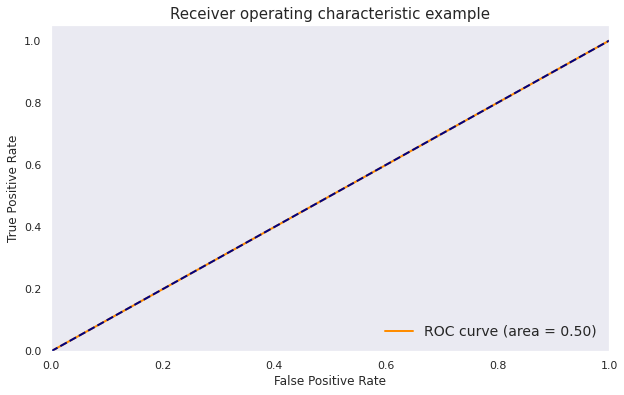

In [212]:
plot_roc(y_true_2_Xception_Test, y_score_2_Xception_Test)

##### 6.3.2.4 Confusion Matrix

###### 6.3.2.4.1 Defining the Confusion Matrix Function

In [213]:
def positive_negative_measurement(y_true, y_score):
    # Initialization
    TRUE_POSITIVE = 0
    FALSE_POSITIVE = 0
    TRUE_NEGATIVE = 0
    FALSE_NEGATIVE = 0
    
    # Calculating the model
    for i in range(len(y_score)):
        if y_true[i] == y_score[i] == 1:
            TRUE_POSITIVE += 1
        if (y_score[i] == 1) and (y_true[i] != y_score[i]):
            FALSE_POSITIVE += 1
        if y_true[i] == y_score[i] == 0:
            TRUE_NEGATIVE += 1
        if (y_score[i] == 0) and (y_true[i] != y_score[i]):
            FALSE_NEGATIVE += 1

    return(TRUE_POSITIVE, FALSE_POSITIVE, TRUE_NEGATIVE, FALSE_NEGATIVE)

In [214]:
TRUE_POSITIVE_Xception_Test, FALSE_POSITIVE_Xception_Test, TRUE_NEGATIVE_Xception_Test, FALSE_NEGATIVE_Xception_Test = positive_negative_measurement(y_true_2_Xception_Test, y_score_2_Xception_Test)
postives_negatives_Xception_Test = [[TRUE_POSITIVE_Xception_Test, FALSE_POSITIVE_Xception_Test], 
                                    [FALSE_NEGATIVE_Xception_Test, TRUE_NEGATIVE_Xception_Test]]

###### 6.3.2.4.2 Obtaining the Labels

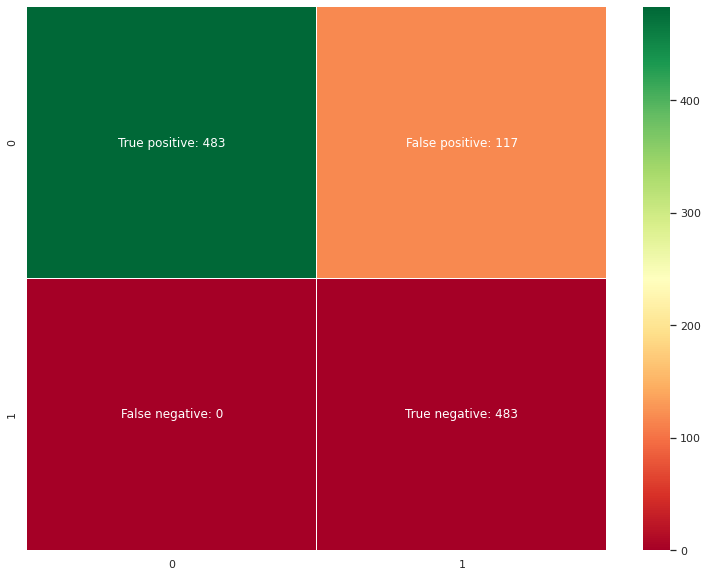

In [215]:
import seaborn as sns
sns.set()
labels_Xception_Test =  np.array([['True positive: ' + str(TRUE_POSITIVE_Xception_Test),
                                    'False positive: ' + str(FALSE_POSITIVE_Xception_Test)],
                                    ['False negative: ' + str(FALSE_NEGATIVE_Xception_Test),
                                    'True negative: ' + str(TRUE_POSITIVE_Xception_Test)]])
plt.figure(figsize = (13, 10))
sns.heatmap(postives_negatives_Xception_Test, annot = labels_Xception_Test, linewidths = 0.1, fmt="", cmap = 'RdYlGn')

###### 6.3.2.4.3 Calculating Sensitivity/Recall/Hit Rate/True Positive Rate

In [216]:
# Sensitivity | Recall | hit rate | true positive rate (TPR)
sensitivity_Xception_Test = TRUE_POSITIVE_Xception_Test / (TRUE_POSITIVE_Xception_Test + FALSE_NEGATIVE_Xception_Test)
print("Sensitivity: ", sensitivity_Xception_Test)

Sensitivity:  1.0


###### 6.3.2.4.4 Calculating Specificity/Selectivity/True Negative Rate

In [217]:
# Specificity | selectivity | true negative rate (TNR)
try:
    specifity_Xception_Test = TRUE_NEGATIVE_Xception_Test / (TRUE_NEGATIVE_Xception_Test + FALSE_NEGATIVE_Xception_Test)
    print("Specifity: ", specifity_Xception_Test)
except:
    print("No Specificity due to NO NEGATIVE results.")

No Specificity due to NO NEGATIVE results.


###### 6.3.2.4.5 Calculating Precision/Positive Predictive Value

In [218]:
# Precision | positive predictive value (PPV)
predcision_Xception_Test = TRUE_POSITIVE_Xception_Test / (TRUE_POSITIVE_Xception_Test + FALSE_POSITIVE_Xception_Test)
print("Precision: ", predcision_Xception_Test)

Precision:  0.805


###### 6.3.2.4.6 Negative Predictive Value

In [219]:
# Negative predictive value (NPV)
try:
    npv_Xception_Test = TRUE_NEGATIVE_Xception_Test / (TRUE_NEGATIVE_Xception_Test + FALSE_NEGATIVE_Xception_Test)
    print("Negative predictive value: ", npv_Xception_Test)
except:
    print("0 Negative Predictions")

0 Negative Predictions


###### 6.3.2.4.7 Calculating Accuracy

In [220]:
# Accuracy 
accuracy_Xception_Test = (TRUE_POSITIVE_Xception_Test + TRUE_NEGATIVE_Xception_Test) / (TRUE_POSITIVE_Xception_Test + FALSE_POSITIVE_Xception_Test + TRUE_NEGATIVE_Xception_Test + FALSE_NEGATIVE_Xception_Test)
print("Accuracy: ", accuracy_Xception_Test)

Accuracy:  0.805


## 7. Evaluating the Models Together on Testing Data - Ensembling the models

In [221]:
from keras.layers import Input

### 7.1 Defining the Input Shape

In [222]:
# Single input for multiple models
model_input = Input(shape=(512, 512, 3))

### 7.2 Defining all the Models

In [223]:
def mobilenet_architecture():
    """
    Pre-build architecture of mobilenet for our dataset.
    """
    # Imprting the model
    from keras.applications.mobilenet import MobileNet

    # Pre-build model
    base_model = MobileNet(include_top = False, weights = None, input_tensor = model_input)

    # Adding output layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    output = Dense(units = 2, activation = 'softmax')(x)

    # Creating the whole model
    mobilenet_model = Model(base_model.input, output)
    
    # Getting the summary of architecture
    mobilenet_model.summary()
    
    # Compiling the model
    mobilenet_model.compile(optimizer = keras.optimizers.Adam(lr = 0.001), 
                            loss = 'categorical_crossentropy', 
                            metrics = ['accuracy'])

    return mobilenet_model

In [224]:
# Model 1
mobilenet_model = mobilenet_architecture()
mobilenet_model.load_weights("/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/weights.best.mobilenet.hdf5")

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 512, 512, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 256, 256, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 256, 256, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 256, 256, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 256, 256, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 256, 256, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 256, 256, 32)      0  

In [225]:
def inception_architecture():
    """
    Pre-build architecture of inception for our dataset.
    """
    # Imprting the model 
    from keras.applications.inception_v3 import InceptionV3

    # Pre-build model
    base_model = InceptionV3(include_top = False, weights = None, input_tensor = model_input)

    # Adding output layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    output = Dense(units = 2, activation = 'softmax')(x)

    # Creating the whole model
    inception_model = Model(base_model.input, output)
    
    # Summary of the model
    inception_model.summary()
    
    # Compiling the model
    inception_model.compile(optimizer = keras.optimizers.Adam(lr = 0.001), 
                            loss = 'categorical_crossentropy', 
                            metrics = ['accuracy'])
    
    return inception_model

In [226]:
# Model 2
inception_model = inception_architecture()
inception_model.load_weights("/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/weights.best.InceptionV3.hdf5")

Model: "model_16"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv2d_490 (Conv2D)             (None, 255, 255, 32) 864         input_11[0][0]                   
__________________________________________________________________________________________________
batch_normalization_490 (BatchN (None, 255, 255, 32) 96          conv2d_490[0][0]                 
__________________________________________________________________________________________________
activation_470 (Activation)     (None, 255, 255, 32) 0           batch_normalization_490[0][0]    
___________________________________________________________________________________________

In [227]:
def xception_architecture():
    """
    Pre-build architecture of inception for our dataset.
    """
    # Imprting the model
    from keras.applications.xception import Xception

    # Pre-build model
    base_model = Xception(include_top = False, weights = None, input_tensor = model_input)

    # Adding output layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    output = Dense(units = 2, activation = 'softmax')(x)

    # Creating the whole model
    xception_model = Model(base_model.input, output)

    # Summary of the model
    xception_model.summary()
    
    # Compiling the model
    xception_model.compile(optimizer = keras.optimizers.Adam(lr = 0.001), 
                           loss = 'categorical_crossentropy', 
                           metrics = ['accuracy'])

    return xception_model

In [228]:
# Model 3
xception_model = xception_architecture()
xception_model.load_weights("/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/xception_weights.hdf5")

Model: "model_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 255, 255, 32) 864         input_11[0][0]                   
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 255, 255, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 255, 255, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

### 7.3 Appending All the Models

In [229]:
# Appending all models
models = [mobilenet_model, inception_model, xception_model]

### 7.4 Defining the Ensembling Function

In [230]:
def ensemble(models, model_input):
    outputs = [model.outputs[0] for model in models]
    y = keras.layers.Average()(outputs)
    model = Model(model_input, y, name='ensemble')
    return model

In [231]:
# Getting ensemble model
ensemble_model = ensemble(models, model_input)

### 7.5 Evaluating ensemble model

In [232]:
# Compute test set predictions
#model_architecture,path_model_weight
NUMBER_TEST_SAMPLES_Ensemble_Test = 600

all_weights_combined_as_list = weights_of_MobileNet_Inception_and_Xception

y_true_Ensemble_Test = test_targets[:NUMBER_TEST_SAMPLES_Ensemble_Test]
y_score_Ensemble_Test = []
for index in range(NUMBER_TEST_SAMPLES_Ensemble_Test): #compute one at a time due to memory constraints
    probs_Ensemble_Test = predict_ensemble(img_path = test_files[index], model_architecture = ensemble_model, path_model_weight = "/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/Ensemble Model/ensemble_model.h5")
    print("Real values {}...".format(index+1) + "Melanoma : ", test_targets[index][0], " | Other : ", test_targets[index][1])
    print("---------------------------------------------------------------------------")
    y_score_Ensemble_Test.append(probs_Ensemble_Test)
    
correct_Ensemble_Test = np.array(y_true_Ensemble_Test) == np.array(y_score_Ensemble_Test)

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/Ensemble Model/ensemble_model.h5
Model Weights: 
None
Prediction... Melanoma :  0.7622436  | Other :  0.2377564
Real values 146...Melanoma :  1.0  | Other :  0.0
---------------------------------------------------------------------------
Image Path: 
/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Test_v2_Data/Data Image JPG/ISIC_0013891.jpg
Arhitecture Used:
Path for Model Weights: 
/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/Ensemble Model/ensemble_model.h5
Model Weights: 
None
Prediction... Melanoma :  0.7676243  | Other :  0.23237574
Real values 147...Melanoma :  0.0  | Other :  1.0
---------------------------------------------------------------------------
Image Path: 
/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Test_v2_Data/Data Image JPG/ISIC_0013998.jpg
Arhitecture Used:
Path 

In [233]:
print("Accuracy = %2.2f%%" % (np.mean(correct_Ensemble_Test)*100))

Accuracy = 80.50%


In [234]:
image_to_predict_Ensemble_Test = path_to_tensor("/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Output_melanoma/ISIC_0000000_180_angle_flipped.jpg").astype('float32')/255.
ensemble_model.predict(image_to_predict_Ensemble_Test)

array([[0.7623098 , 0.23769021]], dtype=float32)

#### 7.5.1 Compute Test Set Predictions

In [235]:
# Compute test set predictions
NUMBER_TEST_SAMPLES_Ensemble_Test = 600

all_weights_combined_as_list = weights_of_MobileNet_Inception_and_Xception

y_true_Ensemble_Test = test_targets[:NUMBER_TEST_SAMPLES_Ensemble_Test]
y_score_Ensemble_Test = []
for index in range(NUMBER_TEST_SAMPLES_Ensemble_Test): #compute one at a time due to memory constraints
    probs_Ensemble_Test = predict(img_path = test_files[index], model_architecture = ensemble_model, path_model_weight = "/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/Ensemble Model/ensemble_model.h5")
    print("Real values {}...".format(index+1) + "Melanoma : ", test_targets[index][0], " | Other : ", test_targets[index][1])
    print("---------------------------------------------------------------------------")
    y_score_Ensemble_Test.append(probs_Ensemble_Test)
    
correct_Ensemble_Test = np.array(y_true_Ensemble_Test) == np.array(y_score_Ensemble_Test)

Streaming output truncated to the last 5000 lines.
Image Path: /content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Test_v2_Data/Data Image JPG/ISIC_0013414.jpg
Arhitecture Used:
Path for Model Weights: 
/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/Ensemble Model/ensemble_model.h5
Model Weights: 
None
Prediction... Melanoma :  0.76902765  | Other :  0.23097235
Real values 101...Melanoma :  0.0  | Other :  1.0
---------------------------------------------------------------------------
Image Path: /content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Test_v2_Data/Data Image JPG/ISIC_0013325.jpg
Arhitecture Used:
Path for Model Weights: 
/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/Ensemble Model/ensemble_model.h5
Model Weights: 
None
Prediction... Melanoma :  0.76645195  | Other :  0.2335481
Real values 102...Melanoma :  1.0  | Other :  0.0
--------------------------------------------------------

In [236]:
print("Accuracy = %2.2f%%" % (np.mean(correct_Ensemble_Test)*100))

Accuracy = 80.50%


#### 7.5.2 Evaluating the Model

##### 7.5.2.1 Re-ordering the Actual y for ROC

In [237]:
# Re-ordering the actual y (for ROC)
y_true_2_Ensemble_Test = []
for i in range(len(y_true_Ensemble_Test)):
    y_true_2_Ensemble_Test.append(y_true_Ensemble_Test[i][0])

##### 7.5.2.2 Re-ordering the Predict y for ROC

In [238]:
# Re-ordering the predicte y (for ROC)
y_score_2_Ensemble_Test = []
for i in range(len(y_score_Ensemble_Test)):
    y_score_2_Ensemble_Test.append(y_score_Ensemble_Test[i][0])

##### 7.5.2.3 Plotting the Re-ordered ROC

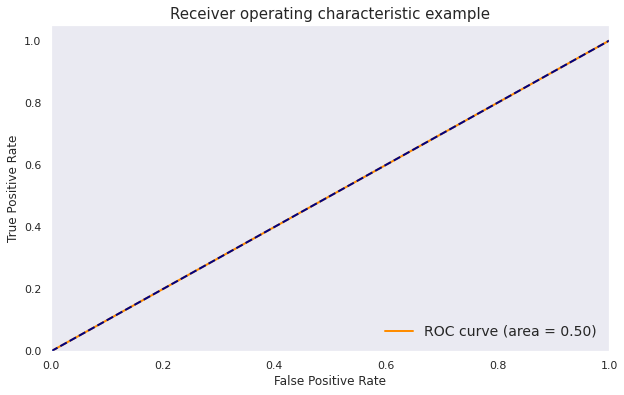

In [239]:
plot_roc(y_true_2_Ensemble_Test, y_score_2_Ensemble_Test)

##### 7.5.2.4 Confusion Matrix

###### 7.5.2.4.1 Defining the Confusion Matrix Function

In [240]:
def positive_negative_measurement(y_true, y_score):
    # Initialization
    TRUE_POSITIVE = 0
    FALSE_POSITIVE = 0
    TRUE_NEGATIVE = 0
    FALSE_NEGATIVE = 0
    
    # Calculating the model
    for i in range(len(y_score)):
        if y_true[i] == y_score[i] == 1:
            TRUE_POSITIVE += 1
        if (y_score[i] == 1) and (y_true[i] != y_score[i]):
            FALSE_POSITIVE += 1
        if y_true[i] == y_score[i] == 0:
            TRUE_NEGATIVE += 1
        if (y_score[i] == 0) and (y_true[i] != y_score[i]):
            FALSE_NEGATIVE += 1

    return(TRUE_POSITIVE, FALSE_POSITIVE, TRUE_NEGATIVE, FALSE_NEGATIVE)

In [241]:
TRUE_POSITIVE_Ensemble_Test, FALSE_POSITIVE_Ensemble_Test, TRUE_NEGATIVE_Ensemble_Test, FALSE_NEGATIVE_Ensemble_Test = positive_negative_measurement(y_true_2_Ensemble_Test, y_score_2_Ensemble_Test)
postives_negatives_Ensemble_Test = [[TRUE_POSITIVE_Ensemble_Test, FALSE_POSITIVE_Ensemble_Test], 
                                    [FALSE_NEGATIVE_Ensemble_Test, TRUE_NEGATIVE_Ensemble_Test]]

###### 7.5.2.4.2 Obtaining the Labels

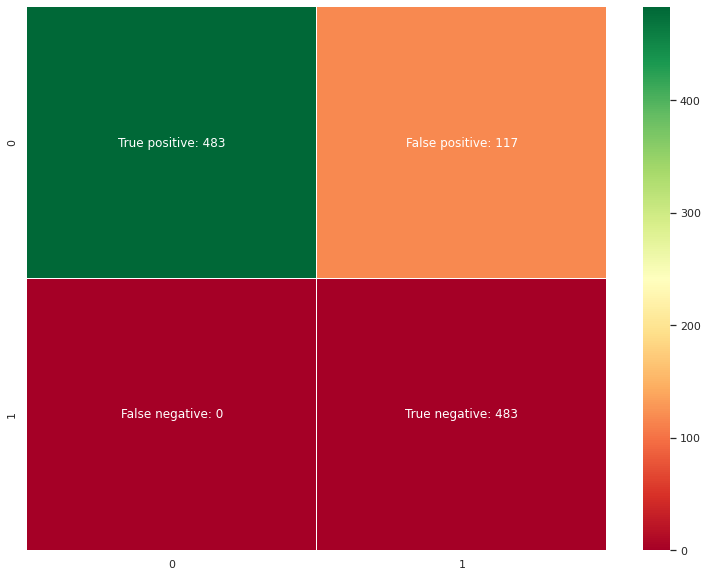

In [242]:
import seaborn as sns
sns.set()
labels_Ensemble_Test =  np.array([['True positive: ' + str(TRUE_POSITIVE_Ensemble_Test),
                                    'False positive: ' + str(FALSE_POSITIVE_Ensemble_Test)],
                                    ['False negative: ' + str(FALSE_NEGATIVE_Ensemble_Test),
                                    'True negative: ' + str(TRUE_POSITIVE_Ensemble_Test)]])
plt.figure(figsize = (13, 10))
sns.heatmap(postives_negatives_Ensemble_Test, annot = labels_Ensemble_Test, linewidths = 0.1, fmt="", cmap = 'RdYlGn')

###### 7.5.2.4.3 Calculating Sensitivity/Recall/Hit Rate/True Positive Rate

In [243]:
# Sensitivity | Recall | hit rate | true positive rate (TPR)
sensitivity_Ensemble_Test = TRUE_POSITIVE_Ensemble_Test / (TRUE_POSITIVE_Ensemble_Test + FALSE_NEGATIVE_Ensemble_Test)
print("Sensitivity: ", sensitivity_Ensemble_Test)

Sensitivity:  1.0


###### 7.5.2.4.4 Calculating Specificity/Selectivity/True Negative Rate

In [244]:
# Specificity | selectivity | true negative rate (TNR)
try:
    specifity_Ensemble_Test = TRUE_NEGATIVE_Ensemble_Test / (TRUE_NEGATIVE_Ensemble_Test + FALSE_NEGATIVE_Ensemble_Test)
    print("Specifity: ", specifity_Ensemble_Test)
except:
    print("No Specificity due to NO NEGATIVE results.")

No Specificity due to NO NEGATIVE results.


###### 7.5.2.4.5 Calculating Precision/Positive Predictive Value

In [245]:
# Precision | positive predictive value (PPV)
predcision_Ensemble_Test = TRUE_POSITIVE_Ensemble_Test / (TRUE_POSITIVE_Ensemble_Test + FALSE_POSITIVE_Ensemble_Test)
print("Precision: ", predcision_Ensemble_Test)

Precision:  0.805


###### 7.5.2.4.6 Negative Predictive Value

In [246]:
# Negative predictive value (NPV)
try:
    npv_Ensemble_Test = TRUE_NEGATIVE_Ensemble_Test / (TRUE_NEGATIVE_Ensemble_Test + FALSE_NEGATIVE_Ensemble_Test)
    print("Negative predictive value: ", npv_Ensemble_Test)
except:
    print("0 Negative Predictions")

0 Negative Predictions


###### 7.5.2.4.7 Calculating Accuracy

In [247]:
# Accuracy 
accuracy_Ensemble_Test = (TRUE_POSITIVE_Ensemble_Test + TRUE_NEGATIVE_Ensemble_Test) / (TRUE_POSITIVE_Ensemble_Test + FALSE_POSITIVE_Ensemble_Test + TRUE_NEGATIVE_Ensemble_Test + FALSE_NEGATIVE_Ensemble_Test)
print("Accuracy: ", accuracy_Ensemble_Test)

Accuracy:  0.805


## 8. Localization

In [248]:
# Importing the libraries
from keras.applications.mobilenet import preprocess_input
import scipy
import cv2

### 8.1 Obtaining the Path for the MobileNet Architecture Models

In [249]:
path_to_model_weight = "/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/Saved Models/weights.best.mobilenet.hdf5"

### 8.2 Sample Image Path

In [250]:
img_path = "/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/ISIC-2017_Test_v2_Data/Data Image JPG/ISIC_0012086.jpg"

### 8.3 Defining the function for the Layer Weights for MobileNet

In [251]:
def getting_two_layer_weights(path_model_weight = path_to_model_weight):
    # The model

    # Imprting the model
    from keras.applications.mobilenet import MobileNet

    # Pre-build model
    base_model = MobileNet(include_top = False, weights = None, input_shape = (512, 512, 3))

    # Adding output layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    output = Dense(units = 2, activation = 'softmax')(x)

    # Creating the whole model
    model = Model(base_model.input, output)
    #model.summary()

    # Compiling the model
    model.compile(optimizer = keras.optimizers.Adam(lr = 0.001), 
                  loss = 'categorical_crossentropy', 
                  metrics = ['accuracy'])
    
    # loading the weights
    model.load_weights(path_model_weight)
    
    # Getting the AMP layer weight
    all_amp_layer_weights = model.layers[-1].get_weights()[0]
    
    # Extracting the wanted output
    mobilenet_model = Model(inputs = model.input, outputs = (model.layers[-3].output, model.layers[-1].output))
    
    return mobilenet_model, all_amp_layer_weights

In [252]:
mobilenet_model, all_amp_layer_weights = getting_two_layer_weights(path_to_model_weight)

### 8.4 Defining Class Activation Map Function

In [253]:
def mobilenet_CAM(img_path, model, all_amp_layer_weights):
    # Getting filtered images from last convolutional layer + model prediction output
    last_conv_output, predictions = model.predict(path_to_tensor(img_path)) # last_conv_output.shape = (1, 16, 16, 1024)
    
    # Converting the dimension of last convolutional layer to 16 x 16 x 1024     
    last_conv_output = np.squeeze(last_conv_output)
    
    # Model's prediction
    predicted_class = np.argmax(predictions)
    
    # Bilinear upsampling (resize each image to size of original image)
    mat_for_mult = scipy.ndimage.zoom(last_conv_output, (32, 32, 1), order = 1)  # dim from (16, 16, 1024) to (512, 512, 1024)
    
    # Getting the AMP layer weights
    amp_layer_weights = all_amp_layer_weights[:, predicted_class] # dim: (1024,)    
    
    # CAM for object class that is predicted to be in the image
    final_output = np.dot(mat_for_mult, amp_layer_weights) # dim: 512 x 512

    # Return class activation map (CAM)
    return final_output, predicted_class

In [254]:
final_output, predicted_class = mobilenet_CAM(img_path, mobilenet_model, all_amp_layer_weights)

### 8.5 Plotting the Class Activation Function for MobileNet

In [255]:
def plot_CAM(img_path, ax, model, all_amp_layer_weights):
    # Loading the image / resizing to 512x512 / Converting BGR to RGB
    #im = cv2.resize(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB), (512, 512))
    im = path_to_tensor(img_path).astype("float32")/255.
    
    # Plotting the image
    ax.imshow(im.squeeze(), vmin=0, vmax=255)
    
    # Getting the class activation map
    CAM, pred = mobilenet_CAM(img_path, model, all_amp_layer_weights)
    
    CAM = (CAM - CAM.min()) / (CAM.max() - CAM.min())
    
    # Plotting the class activation map
    ax.imshow(CAM, cmap = "jet", alpha = 0.5, interpolation='nearest', vmin=0, vmax=1)

### 8.6 Visualizing the Images

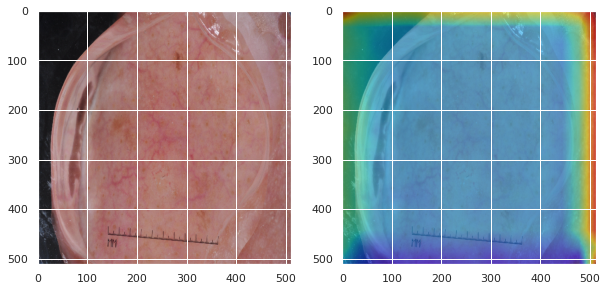

In [256]:
# Visualizing images with and without localization
# Canvas
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10, 10))
# Image without localization
ax[0].imshow((path_to_tensor(img_path).astype('float32')/255).squeeze())
# Image with localization
CAM = plot_CAM(img_path, ax[1], mobilenet_model, all_amp_layer_weights)
plt.show()

In [257]:
# predict_0_0 = 0.7350246
# predict_0_1 = 0.26497543

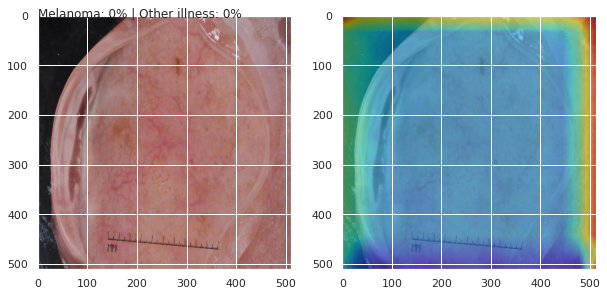

In [258]:
# Getting the image tensor
image_to_predict = path_to_tensor(img_path).astype('float32')/255

# Predicting the image
prediction = ensemble_model.predict(image_to_predict)
prediction_final = "Melanoma: " + str(np.round(predict_0_0*100, decimals = 4)) + "%" + \
                   " | Other illness: " + str(np.round(predict_0_1*100, decimals = 4)) + "%"

# Canvas initialization
fig = plt.figure(figsize = (10, 10))

# First image
ax = fig.add_subplot(121)
ax.imshow(image_to_predict.squeeze())
ax.text(0.3, 1.6, prediction_final)

# Second image
ax = fig.add_subplot(122)
CAM = plot_CAM(img_path, ax, mobilenet_model, all_amp_layer_weights)

plt.show()

## 9. Saving the Complete Model for the Python Interface Application

In [ ]:
%cd "/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/FINAL SAVED OUTPUTS/"
ensemble_model.save('FINAL_FILE_for_Soft_Computing_Project_Skin_Cancer.h5')
from tensorflow.keras.models import load_model
h5_saved_ensemble_model = load_model('FINAL_FILE_for_Soft_Computing_Project_Skin_Cancer.h5')
h5_saved_ensemble_model.summary()

/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/FINAL SAVED OUTPUTS
Model: "ensemble"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv2d_490 (Conv2D)             (None, 255, 255, 32) 864         input_11[0][0]                   
__________________________________________________________________________________________________
batch_normalization_490 (BatchN (None, 255, 255, 32) 96          conv2d_490[0][0]                 
__________________________________________________________________________________________________
activation_470 (Activation)     (None, 255, 255, 32) 0           batch_normalization_490[0][0]    
__________

## 10. Converting the .h5 File to .tflite File for the Python Interface Application

In [ ]:
import tensorflow as tf

saved_ensemble_model = tf.keras.models.load_model('/content/drive/MyDrive/dataset/ISIC Challenge 2017 Organized/FINAL SAVED OUTPUTS/FINAL_FILE_for_Soft_Computing_Project_Skin_Cancer.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(saved_ensemble_model)
tflite_model = converter.convert()
open("FINAL_FILE_for_Interface_Soft_Computing_Project_Skin_Cancer.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpkfr8ccji/assets


183140620